
NLP Project + Project work  - The HaSpeeDe2

Authors:

*   Fabian Vincenzi fabian.vincenzi@studio.unibo.it
*   Davide Perozzi davide.perozzi@studio.unibo.it
*   Martina Ianaro martina.ianaro@studio.unibo.it


https://github.com/martinaianaro99/Natural_Language_Processing/tree/main/HaSpeeDe

# Functions

In [1]:
import os
import random 
import numpy as np
import torch 
import pandas as pd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

def set_reproducibility(seed):
  random.seed(seed)
  np.random.seed(seed)
  rng = np.random.default_rng(seed)
  torch.manual_seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [2]:
class EarlyStopping(object):
    def __init__(self, mode='min', min_delta=0, patience=2, percentage=False):
        self.mode = mode
        self.min_delta = min_delta
        self.patience = patience
        self.best = None
        self.num_bad_epochs = 0
        self.is_better = None
        self._init_is_better(mode, min_delta, percentage)

        if patience == 0:
            self.is_better = lambda a, b: True
            self.step = lambda a: False

    def step(self, metrics):
        if self.best is None:
            self.best = metrics
            return False

        if np.isnan(metrics):
            return True

        if self.is_better(metrics, self.best):
            self.num_bad_epochs = 0
            self.best = metrics
        else:
            self.num_bad_epochs += 1

        if self.num_bad_epochs >= self.patience:
            print('terminating because of early stopping!')
            return True
        return False

    def _init_is_better(self, mode, min_delta, percentage):
        if mode not in {'min', 'max'}:
            raise ValueError('mode ' + mode + ' is unknown!')
        if not percentage:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - min_delta
            if mode == 'max':
                self.is_better = lambda a, best: a > best + min_delta
        else:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - (
                            best * min_delta / 100)
            if mode == 'max':
                self.is_better = lambda a, best: a > best + (
                            best * min_delta / 100)
                       

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.1 MB/s eta 0:00:00


# Download

In [4]:
url1 = 'https://github.com/msang/haspeede/blob/master/2020/haspeede2_dev.zip?raw=true'
url2 = 'https://github.com/msang/haspeede/blob/master/2020/haspeede2_reference.zip?raw=true'
pwd = b"zNw3tCszKWcpDahq"  

resp = urlopen(url1)
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.extractall('/content/haspeede2_dev', pwd=pwd)

resp = urlopen(url2)
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.extractall('/content/haspeede2_reference', pwd=pwd)

In [5]:
dev_df = pd.read_csv('/content/haspeede2_dev/haspeede2_dev_taskAB.tsv', sep='\t',
                     names=['id', 'text', 'hs', 'stereotype'], usecols=[0, 1, 2, 3], header=0)

test_df = pd.read_csv('/content/haspeede2_reference/haspeede2_reference/haspeede2_reference_taskAB-tweets.tsv', sep='\t', names=['id', 'text', 'hs', 'stereotype'], usecols=[0, 1, 2, 3], header=0)

test_df_news = pd.read_csv('/content/haspeede2_reference/haspeede2_reference/haspeede2_reference_taskAB-news.tsv', sep='\t', names=['id', 'text', 'hs', 'stereotype'], usecols=[0, 1, 2, 3], header=0)

In [6]:
dev_df.head()

,id,text,hs,stereotype
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
1,2045,@user @user infatti finché ci hanno guadagnato...,0,0
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
3,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0


In [7]:
test_df.head()

,id,text,hs,stereotype
0,12113,@user e' un perfetto musulmano!!! chi dice il ...,1,1
1,11770,Mai Tg e i giornaloni hanno parlato di questa ...,1,1
2,11937,@user Ipocriti farabutti. Fanno morire i terre...,1,1
3,11870,@user @user @user L'IMMIGRAZIONE C'E' STATO UN...,1,1
4,12122,@user @user SI CERTO E TUTTIQUELLI CHE GIRANO ...,1,1


In [8]:
test_df_news.head()

,id,text,hs,stereotype
0,12142,Che fine spero che faccia il killer nigeriano ...,1,1
1,12088,Così i profughi ci svuotano i negozi a Pordenone,1,1
2,12030,Così umiliano gli italiani e coccolano i cland...,1,1
3,11775,"Danno soldi ai clandestini, ma ai disabili inv...",1,1
4,11630,"Emergenza, Minniti annulla il viaggio e torna ...",1,1


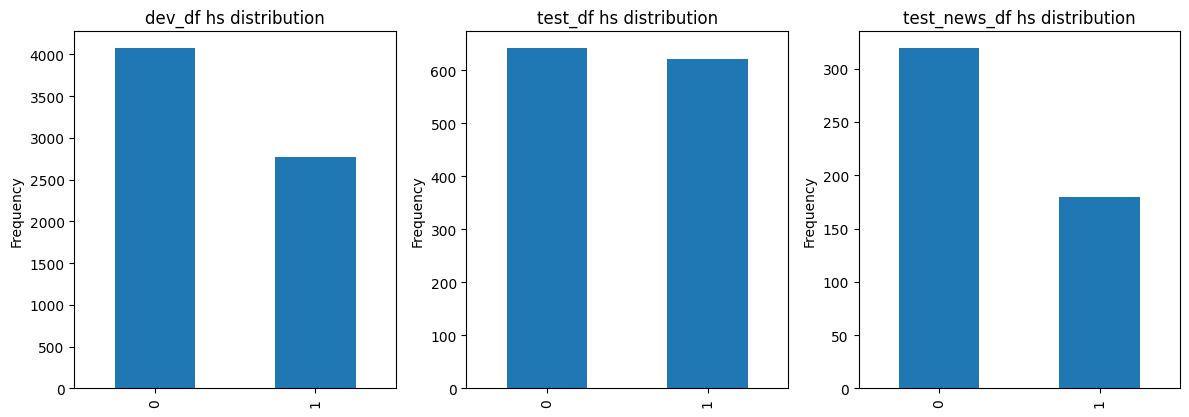

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

dev_df['hs'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('dev_df hs distribution')

test_df['hs'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('test_df hs distribution')

test_df_news['hs'].value_counts().plot(kind='bar', ax=axs[0, 2])
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('test_news_df hs distribution')

#axs[0, 2].remove()
axs[1, 0].remove()
axs[1, 1].remove()
axs[1, 2].remove()

plt.tight_layout()
plt.show()

# TASK A - Hate Speech Detection

## Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
import re

def preprocessing(subset_len=None):
  if subset_len: 
    subset_len = min(len(dev_df), subset_len)
    # Randomly subset
    temp_dev_df = dev_df.sample(n=subset_len)
  else:
    temp_dev_df = dev_df

  # Split dev_df into train and val
  X_train, X_val, y_train, y_val = train_test_split(temp_dev_df['text'], temp_dev_df['hs'], test_size=0.2)

  X_test = test_df['text']
  y_test = test_df['hs']

  X_test_news = test_df_news['text']
  y_test_news = test_df_news['hs']

  sw = stopwords.words('italian')
  stemmer = SnowballStemmer("italian")

  def preprocess_tweet(tweet):
    # convert to lowercase
    tweet = tweet.lower()
    # remove URLs
    tweet = tweet.replace('url', '')
    # remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # remove non-alphanumeric characters
    tweet = re.sub(r'[^\w\s]', ' ', tweet)
    # remove duplicate whitespace and stopwords
    tweet = ' '.join([word for word in tweet.split() if not word in sw])

    return tweet

  X_train = X_train.apply(preprocess_tweet)

  X_val = X_val.apply(preprocess_tweet)

  X_test = X_test.apply(preprocess_tweet)

  X_test_news = X_test_news.apply(preprocess_tweet)
  
  return X_train, X_val, y_train, y_val, X_test, X_test_news, y_test, y_test_news, 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


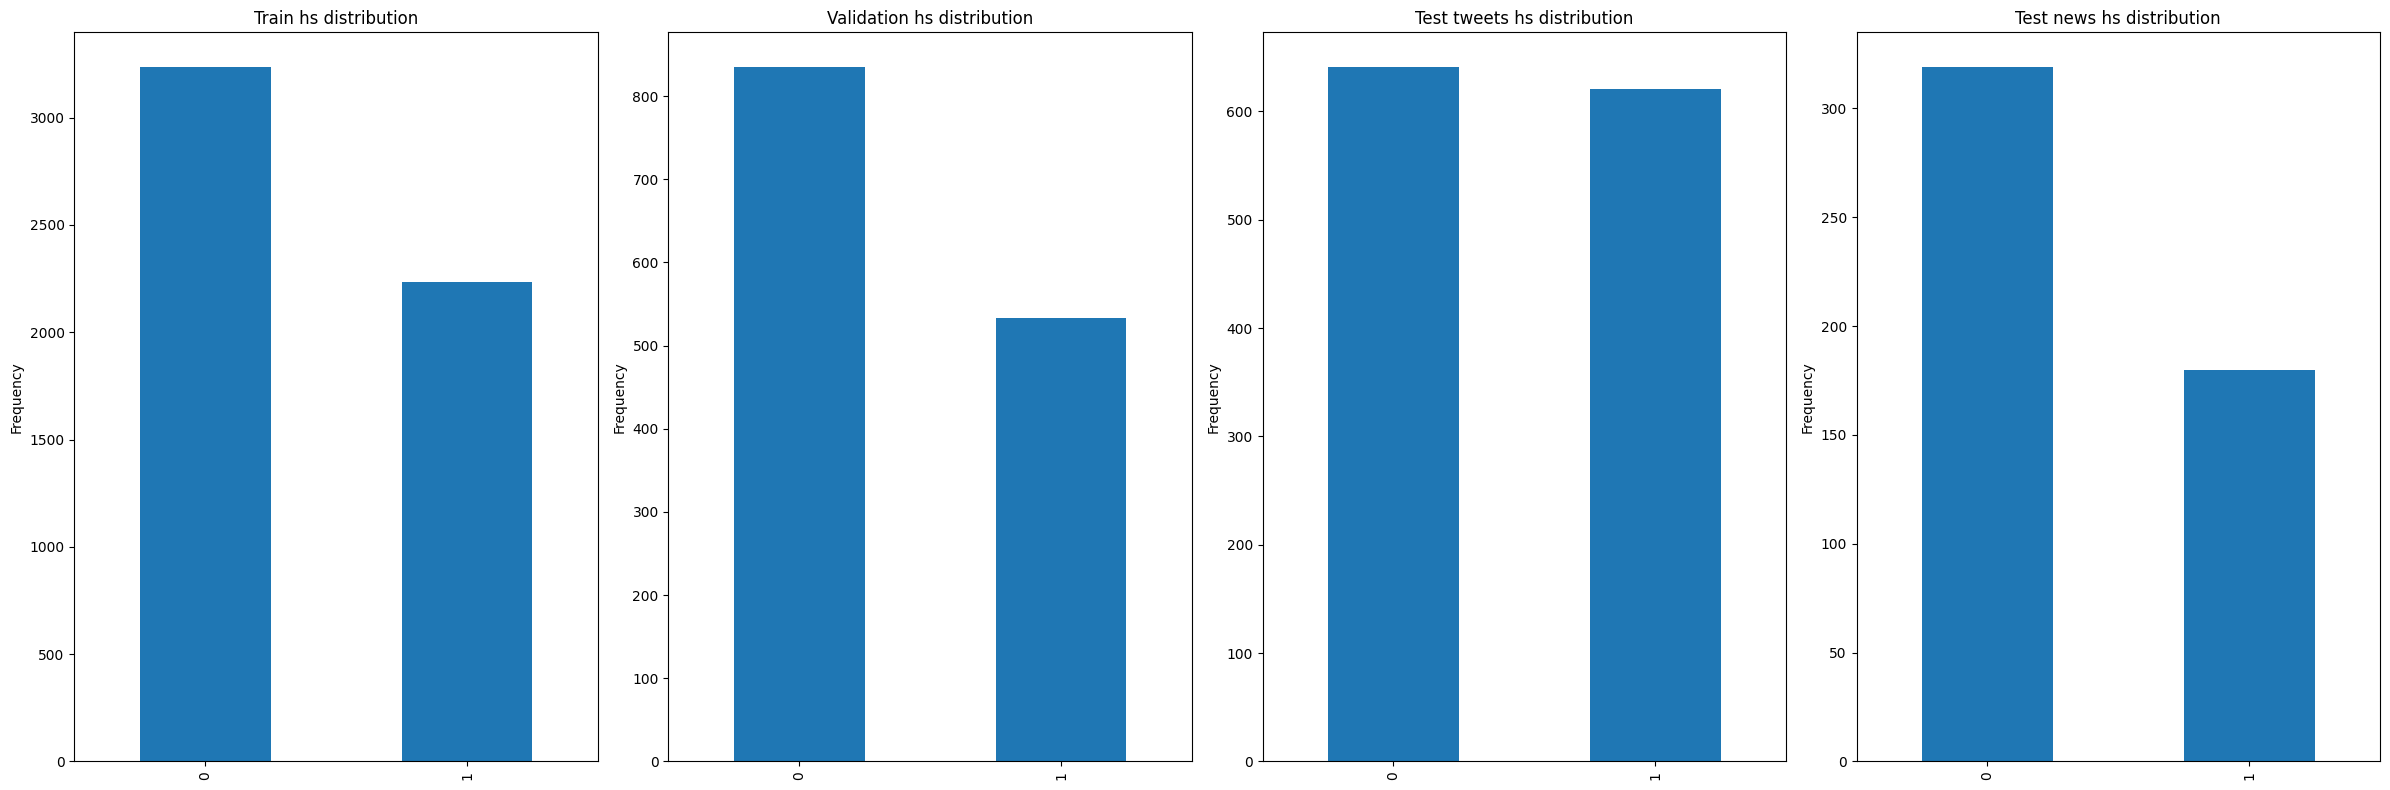

Ratio positive/negative in train set
Positive: 40.83%
Negative: 59.17%
Ratio positive/negative in val set
Positive: 38.96%
Negative: 61.04%
Ratio positive/negative in test set
Positive: 49.21%
Negative: 50.79%
Ratio positive/negative in news test set
Positive: 36.07%
Negative: 63.93%


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_dev = dev_df['text']
y_dev = dev_df['hs']

# split dev_df into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2)

X_test = test_df['text']
y_test = test_df['hs']

X_test_news = test_df_news['text']
y_test_news = test_df_news['hs']

fig, axs = plt.subplots(1, 4, figsize=(24, 8))

y_train.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train hs distribution')

y_val.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_title('Validation hs distribution')

y_test.value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_ylabel('Frequency')
axs[2].set_title('Test tweets hs distribution')

y_test_news.value_counts().plot(kind='bar', ax=axs[3])
axs[3].set_ylabel('Frequency')
axs[3].set_title('Test news hs distribution')

plt.tight_layout()
plt.show()

num_positives = sum(y_train)
num_negatives = len(y_train) - num_positives

positive_ratio_train = (num_positives / len(y_train)) * 100
negative_ratio_train = (num_negatives / len(y_train)) * 100

print(f"Ratio positive/negative in train set")
print(f"Positive: {positive_ratio_train:.2f}%")
print(f"Negative: {negative_ratio_train:.2f}%")

num_positives = sum(y_val)
num_negatives = len(y_val) - num_positives

positive_ratio_val = (num_positives / len(y_val)) * 100
negative_ratio_val = (num_negatives / len(y_val)) * 100

print(f"Ratio positive/negative in val set")
print(f"Positive: {positive_ratio_val:.2f}%")
print(f"Negative: {negative_ratio_val:.2f}%")

num_positives = sum(y_test)
num_negatives = len(y_test) - num_positives

positive_ratio_test = (num_positives / len(y_test)) * 100
negative_ratio_test = (num_negatives / len(y_test)) * 100

print(f"Ratio positive/negative in test set")
print(f"Positive: {positive_ratio_test:.2f}%")
print(f"Negative: {negative_ratio_test:.2f}%")

num_positives = sum(y_test_news)
num_negatives = len(y_test_news) - num_positives

positive_ratio_test = (num_positives / len(y_test_news)) * 100
negative_ratio_test = (num_negatives / len(y_test_news)) * 100

print(f"Ratio positive/negative in news test set")
print(f"Positive: {positive_ratio_test:.2f}%")
print(f"Negative: {negative_ratio_test:.2f}%")

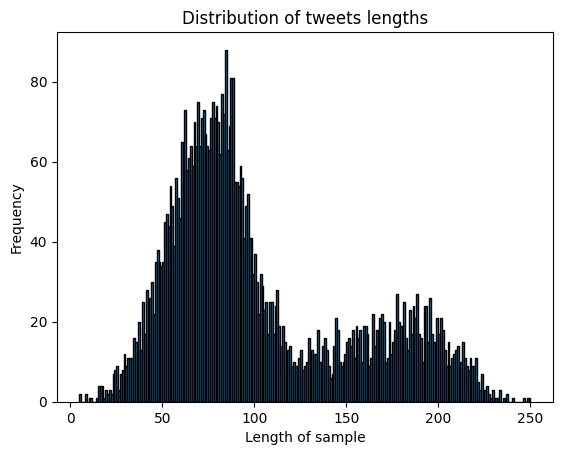

In [ ]:
temp, _, _, _, _, _, _, _ = preprocessing()
lengths = [len(s) for s in temp]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of tweets lengths')
plt.show()

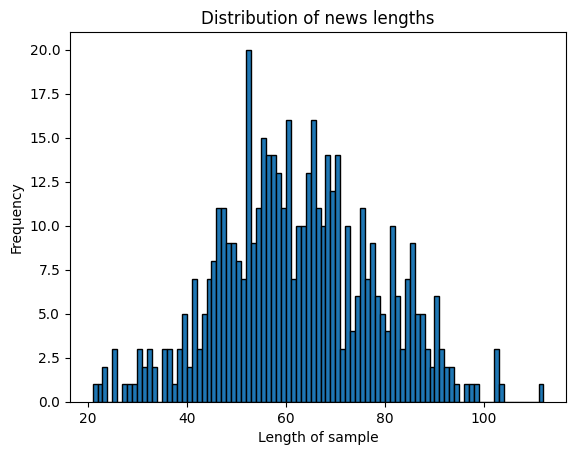

In [ ]:
_, _, _, _, _, temp, _, _ = preprocessing()
lengths = [len(s) for s in temp]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of news lengths')
plt.show()

## Tokenization

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer

def tokenization(X, y, batch_size, tokenizer=None):
  if tokenizer is None:
      tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-italian-uncased")
  
  max_length = 256      
  
  encoding = tokenizer.batch_encode_plus(list(X), max_length=max_length, padding=True, truncation=True)      
  
  input_ids = torch.tensor(encoding['input_ids'])
  attention_mask = torch.tensor(encoding['attention_mask'])
  
  inputs = torch.tensor(input_ids)
  mask = torch.tensor(attention_mask)
  labels = torch.tensor(list(y))

  data = TensorDataset(inputs, mask, labels)
  sampler = RandomSampler(data)
  dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)

  return dataloader

## Model & functions

In [ ]:
from transformers import AutoModel
import torch

class Model(torch.nn.Module):
  def __init__(self, dropout):
    super(Model, self).__init__()
    self.bert = AutoModel.from_pretrained("dbmdz/bert-base-italian-uncased")
    for param in self.bert.parameters():
        param.requires_grad = True
    self.dropout = torch.nn.Dropout(dropout)
    self.linear = torch.nn.Linear(768, 1)

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
    pooled_output = outputs.pooler_output
    pooled_output = self.dropout(pooled_output)
    logits = self.linear(pooled_output)
    return logits

In [ ]:
from tqdm import tqdm

def train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs):
  early_stopping = EarlyStopping(patience=int(num_epochs * 0.1))
  train_losses = []
  val_losses = []
  reports = []
  for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    
    # Train on training set
    train_loss = train_fn(train_dataloader, model, criterion, optimizer)

    # Evaluate on validation set
    val_loss, report = val_fn(val_dataloader, model, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    reports.append(report)

    # Check early stopping
    if early_stopping.step(val_losses[-1]):
      break

  return train_losses, val_losses, reports     

In [ ]:
def train_fn(data_loader, model, criterion, optimizer):
  # Train on training set
  model.train()
  train_loss = 0

  for batch in tqdm(data_loader):
    ids, mask, labels = batch   
    optimizer.zero_grad()

    # Forward pass
    outputs = model(ids.to(device), mask.to(device))
    outputs = outputs.squeeze()
    loss = criterion(outputs.cpu(), labels.type_as(outputs).cpu())
    train_loss += loss.item()  

    # Backward pass
    loss.backward()
    optimizer.step()

  return train_loss / len(data_loader)  


In [ ]:
from sklearn.metrics import classification_report

def val_fn(data_loader, model, criterion):
  model.eval()
  val_loss, predictions, true_labels = 0, [], []
    
  with torch.no_grad():
    for batch in tqdm(data_loader):
      ids, mask, labels = batch
      labels = labels.unsqueeze(1)
      
      # Forward pass
      outputs = model(ids.to(device), mask.to(device))
      loss = criterion(outputs.cpu(), labels.float().cpu())
      val_loss += loss.item()

      preds = (torch.sigmoid(outputs) > 0.5).float()
      predictions.append(preds)
      true_labels.append(labels)

  predictions = torch.cat(predictions, dim=0)
  true_labels = torch.cat(true_labels, dim=0)
  val_loss /= len(data_loader)
  report = classification_report(true_labels.cpu(), predictions.cpu(), labels=[0, 1], zero_division=0, output_dict=True)

  return val_loss, report

## GridSearch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter grid
seeds = [42, 12321]
num_epochs = 20
lr = 1e-5 
batch_sizes = [32, 64]
pos_weight = torch.tensor([1.5])
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

results_df = pd.DataFrame(columns=["learning_rate", "pos_weight", "seed", "batch_size", "dropout_rate", "val_loss", "f1_score"])

# Loop over the hyperparameter grid
for seed in seeds:
  set_reproducibility(seed)
  # preprocessing
  X_train, X_val, y_train, y_val, _, _, _, _ = preprocessing(2500)
  
  for batch_size in batch_sizes:
    # tokenization
    train_dataloader = tokenization(X_train, y_train, batch_size)
    val_dataloader = tokenization(X_val, y_val, batch_size)

    for dropout in dropout_rate:
      # model, criterion, optimizer
      model = Model(dropout).to(device)
      criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
      
      _, losses, reports = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=num_epochs)

      results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


<ipython-input-13-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-13-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.78it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.29it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.42it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.49it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.91it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.35it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.65it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.59it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.24it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.03it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.57it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.57it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.48it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.39it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.36it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.47it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.67it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.10it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.43it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.67it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.17it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.43it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.79it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.77it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.49it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.43it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.39it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.81it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.13it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.85it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.73it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.36it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.55it/s]


Epoch 7


100%|██████████| 16/16 [00:00<00:00, 45.26it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.26it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.42it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 44.44it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.50it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.45it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.68it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-13-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-13-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from

Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.54it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.60it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.71it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.60it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.69it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.78it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.81it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.68it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.59it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.70it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.73it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.77it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.61it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.69it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.73it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.74it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.73it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.76it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.86it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.79it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.77it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.72it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.50it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.79it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.69it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.60it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 25.70it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.59it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.68it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.64it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.71it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.79it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.61it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.50it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.70it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.57it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.58it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.66it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.65it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 25.79it/s]


Epoch 8


100%|██████████| 8/8 [00:00<00:00, 25.84it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-13-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-13-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from

Epoch 1


100%|██████████| 16/16 [00:00<00:00, 44.12it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.39it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.11it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.29it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.94it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.21it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 44.95it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.47it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.96it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.54it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.66it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.50it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.29it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.34it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.45it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.44it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.43it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.48it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.42it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.71it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.06it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.46it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.52it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.03it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.01it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.29it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.42it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.39it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.51it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.48it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.32it/s]


Epoch 7


100%|██████████| 16/16 [00:00<00:00, 46.45it/s]


Epoch 8


100%|██████████| 16/16 [00:00<00:00, 46.19it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.54it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.35it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.89it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.07it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.10it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.51it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-13-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-13-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from

Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.48it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.69it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.59it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.71it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.76it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.39it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 24.49it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.56it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.53it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.72it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.41it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.72it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.29it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.71it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.46it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.58it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.69it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.73it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 24.61it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.70it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.62it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.49it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.69it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.41it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.39it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.63it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.46it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.47it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.33it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.39it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.64it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.61it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.57it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.59it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.43it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.50it/s]
<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.41it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.57it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.60it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.58it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 24.47it/s]


Epoch 8


100%|██████████| 8/8 [00:00<00:00, 24.58it/s]


Epoch 9


100%|██████████| 8/8 [00:00<00:00, 24.65it/s]

terminating because of early stopping!



<ipython-input-18-7317ca55efe4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


In [ ]:
# Get row with max f1_score
max_f1_row = results_df.loc[results_df['f1_score'].idxmax()]

# Get row with lowest val_loss
min_val_loss_row = results_df.loc[results_df['val_loss'].idxmin()]

print(f"Model with the higher f1_score ({max_f1_row['f1_score']:.3f}): seed: {max_f1_row['seed']}, batch_size: {max_f1_row['batch_size']}, dropout rate: {max_f1_row['dropout_rate']:.3f} and loss: {max_f1_row['val_loss']:.3f}\nModel with the lowest loss ({min_val_loss_row['val_loss']:.3f}): seed: {min_val_loss_row['seed']}, batch_size: {min_val_loss_row['batch_size']}, dropout rate: {min_val_loss_row['dropout_rate']:.3f} and f1_score: {min_val_loss_row['f1_score']:.3f}")


Model with the higher f1_score (0.768): seed: 42, batch_size: 32, dropout rate: 0.300 and loss: 0.617
Model with the lowest loss (0.617): seed: 42, batch_size: 32, dropout rate: 0.300 and f1_score: 0.768


In [ ]:
results_df

,learning_rate,pos_weight,seed,batch_size,dropout_rate,val_loss,f1_score
0,0.00001,[tensor(1.5000)],42,32,0.2,0.649557,0.753575
1,0.00001,[tensor(1.5000)],42,32,0.3,0.616973,0.768162
2,0.00001,[tensor(1.5000)],42,32,0.4,0.680527,0.745967
3,0.00001,[tensor(1.5000)],42,32,0.5,0.733926,0.757236
4,0.00001,[tensor(1.5000)],42,32,0.6,0.705088,0.754167
5,0.00001,[tensor(1.5000)],42,32,0.7,0.651182,0.735860
6,0.00001,[tensor(1.5000)],42,32,0.8,0.668162,0.743306
7,0.00001,[tensor(1.5000)],42,64,0.2,0.673259,0.731318
8,0.00001,[tensor(1.5000)],42,64,0.3,0.643355,0.750125
9,0.00001,[tensor(1.5000)],42,64,0.4,0.697512,0.751020


## Train and Test with best hyperparameters

In [ ]:
# hyperparameters
seed = 42
lr = 1e-5 
pos_weight = torch.tensor([1.5])
batch_size = 32
dropout = 0.3

#### Train

In [ ]:
set_reproducibility(seed)
# preprocessing
X_train, X_val, y_train, y_val, _, _, _, _ = preprocessing()
# tokenization
train_dataloader = tokenization(X_train, y_train, batch_size=batch_size)
val_dataloader = tokenization(X_val, y_val, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your model, criterion, optimizer
best_model = Model(dropout).to(device)

# Define your criterion, optimizer
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(best_model.parameters(), lr=lr)

# Train the model and validate loss, F1 score, and precision
train_loss, val_loss, report = train_model(best_model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=2)

<ipython-input-110-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-110-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel fr

Epoch 1


100%|██████████| 43/43 [00:01<00:00, 25.13it/s]


Epoch 2


100%|██████████| 43/43 [00:01<00:00, 24.74it/s]


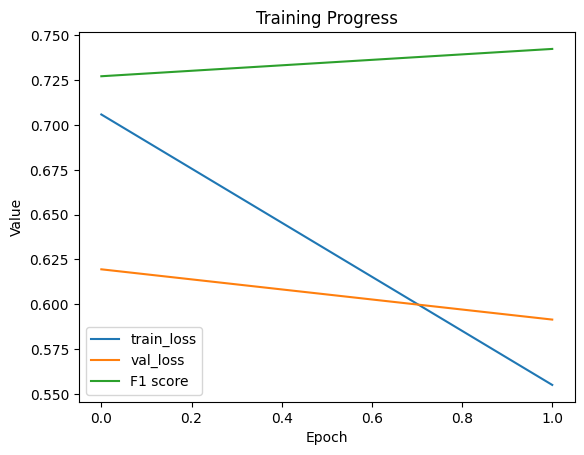

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.plot([report[i]["macro avg"]["f1-score"] for i in range(len(report))], label='F1 score')

plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.legend()
plt.show()

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the fine-tuned model
torch.save(best_model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_hs")

#### Evaluation over tweets and news

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
best_model_hs = Model(dropout)
best_model_hs.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/model_hs"))
best_model_hs = best_model_hs.to(device)


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
set_reproducibility(seed)

# preprocessing
_, _, _, _, X_test, X_test_news, y_test, y_test_news = preprocessing()
# tokenization
test_dataloader = tokenization(X_test, y_test, batch_size=batch_size)
test_news_dataloader = tokenization(X_test_news, y_test_news, batch_size=batch_size)

criterion = torch.nn.BCEWithLogitsLoss()


<ipython-input-91-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-91-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


In [ ]:
loss_tweets, report_tweets = val_fn(test_dataloader, best_model_hs, criterion)

print(f"\nTWEETS")
print(f"\nLoss: {loss_tweets}")

100%|██████████| 40/40 [00:01<00:00, 36.76it/s]


TWEETS

Loss: 0.5954818420112133


In [ ]:
loss_news, report_news = val_fn(test_news_dataloader, best_model_hs, criterion)

print(f"\nNEWS")
print(f"\nLoss: {loss_news}")

100%|██████████| 16/16 [00:00<00:00, 72.60it/s]


NEWS

Loss: 0.5258084442466497


#### Error Analysis - Classification report

In [ ]:
pd.DataFrame(report_tweets).transpose()

,precision,recall,f1-score,support
0,0.878788,0.452418,0.597322,641.000000
1,0.623391,0.935588,0.748229,621.000000
accuracy,0.690174,0.690174,0.690174,0.690174
macro avg,0.751089,0.694003,0.672776,1262.000000
weighted avg,0.753113,0.690174,0.671580,1262.000000


In [ ]:
pd.DataFrame(report_news).transpose()

,precision,recall,f1-score,support
0,0.754768,0.868339,0.807580,319.000000
1,0.681818,0.500000,0.576923,180.000000
accuracy,0.735471,0.735471,0.735471,0.735471
macro avg,0.718293,0.684169,0.692252,499.000000
weighted avg,0.728454,0.735471,0.724377,499.000000


# TASK B - Stereotype detection

## Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
import re

def preprocessing(subset_len=None):
  if subset_len: 
    subset_len = min(len(dev_df), subset_len)
    # Randomly subset
    temp_dev_df = dev_df.sample(n=subset_len)
  else:
    temp_dev_df = dev_df

  # Split dev_df into train and val
  X_train, X_val, y_train, y_val = train_test_split(temp_dev_df['text'], temp_dev_df['stereotype'], test_size=0.2)

  X_test = test_df['text']
  y_test = test_df['stereotype']

  X_test_news = test_df_news['text']
  y_test_news = test_df_news['stereotype']

  sw = stopwords.words('italian')
  stemmer = SnowballStemmer("italian")

  def preprocess_tweet(tweet):
    # convert to lowercase
    tweet = tweet.lower()
    # remove URLs
    tweet = tweet.replace('url', '')
    # remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # remove non-alphanumeric characters
    tweet = re.sub(r'[^\w\s]', ' ', tweet)
    # remove duplicate whitespace and stopwords
    tweet = ' '.join([word for word in tweet.split() if not word in sw])

    return tweet

  X_train = X_train.apply(preprocess_tweet)

  X_val = X_val.apply(preprocess_tweet)

  X_test = X_test.apply(preprocess_tweet)

  X_test_news = X_test_news.apply(preprocess_tweet)
  
  return X_train, X_val, y_train, y_val, X_test, X_test_news, y_test, y_test_news, 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


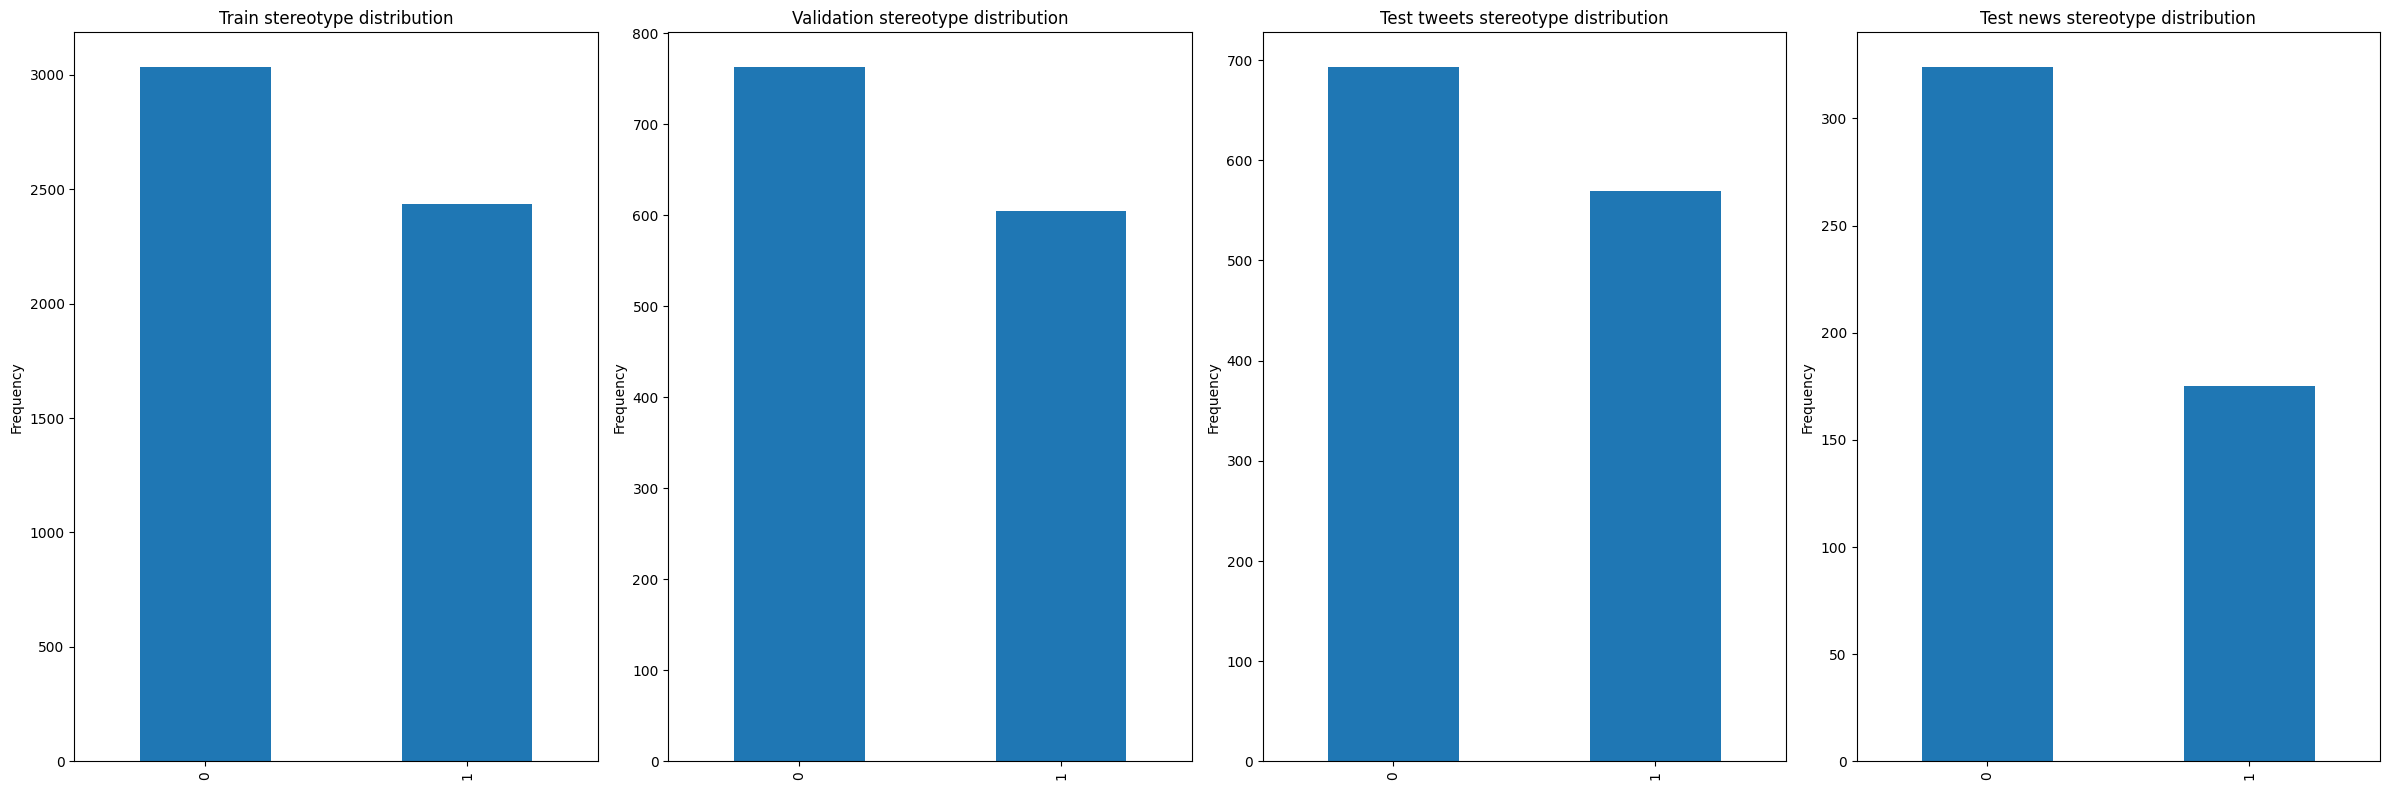

Ratio positive/negative in train set
Positive: 44.54%
Negative: 55.46%
Ratio positive/negative in val set
Positive: 44.23%
Negative: 55.77%
Ratio positive/negative in test set
Positive: 45.09%
Negative: 54.91%
Ratio positive/negative in news test set
Positive: 35.07%
Negative: 64.93%


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_dev = dev_df['text']
y_dev = dev_df['stereotype']

# split dev_df into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2)

X_test = test_df['text']
y_test = test_df['stereotype']

X_test_news = test_df_news['text']
y_test_news = test_df_news['stereotype']

fig, axs = plt.subplots(1, 4, figsize=(24, 8))

y_train.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train stereotype distribution')

y_val.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_title('Validation stereotype distribution')

y_test.value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_ylabel('Frequency')
axs[2].set_title('Test tweets stereotype distribution')

y_test_news.value_counts().plot(kind='bar', ax=axs[3])
axs[3].set_ylabel('Frequency')
axs[3].set_title('Test news stereotype distribution')

plt.tight_layout()
plt.show()

num_positives = sum(y_train)
num_negatives = len(y_train) - num_positives

positive_ratio_train = (num_positives / len(y_train)) * 100
negative_ratio_train = (num_negatives / len(y_train)) * 100

print(f"Ratio positive/negative in train set")
print(f"Positive: {positive_ratio_train:.2f}%")
print(f"Negative: {negative_ratio_train:.2f}%")

num_positives = sum(y_val)
num_negatives = len(y_val) - num_positives

positive_ratio_val = (num_positives / len(y_val)) * 100
negative_ratio_val = (num_negatives / len(y_val)) * 100

print(f"Ratio positive/negative in val set")
print(f"Positive: {positive_ratio_val:.2f}%")
print(f"Negative: {negative_ratio_val:.2f}%")

num_positives = sum(y_test)
num_negatives = len(y_test) - num_positives

positive_ratio_test = (num_positives / len(y_test)) * 100
negative_ratio_test = (num_negatives / len(y_test)) * 100

print(f"Ratio positive/negative in test set")
print(f"Positive: {positive_ratio_test:.2f}%")
print(f"Negative: {negative_ratio_test:.2f}%")

num_positives = sum(y_test_news)
num_negatives = len(y_test_news) - num_positives

positive_ratio_test = (num_positives / len(y_test_news)) * 100
negative_ratio_test = (num_negatives / len(y_test_news)) * 100

print(f"Ratio positive/negative in news test set")
print(f"Positive: {positive_ratio_test:.2f}%")
print(f"Negative: {negative_ratio_test:.2f}%")

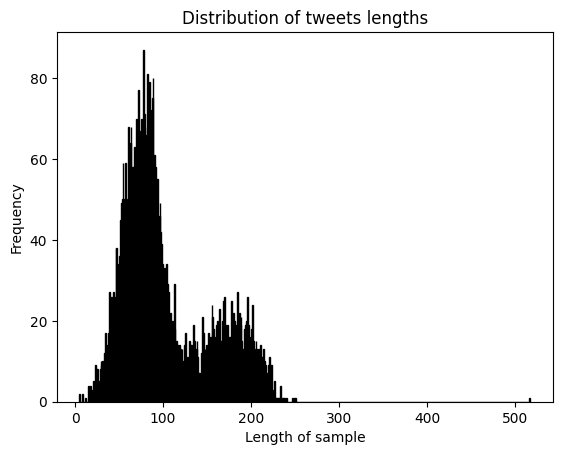

In [ ]:
temp, _, _, _, _, _, _, _ = preprocessing()
lengths = [len(s) for s in temp]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of tweets lengths')
plt.show()

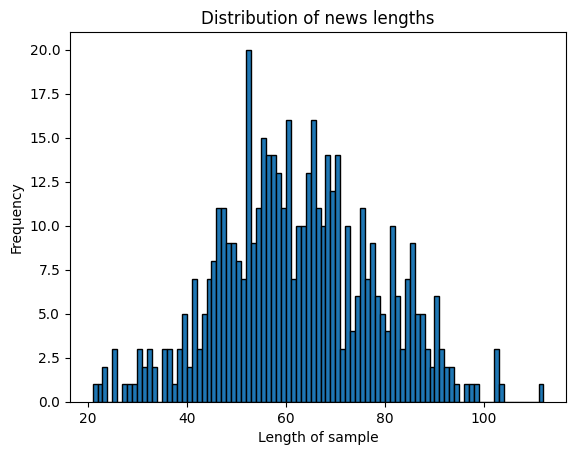

In [ ]:
_, _, _, _, _, temp, _, _ = preprocessing()
lengths = [len(s) for s in temp]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of news lengths')
plt.show()

## Tokenization

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer

def tokenization(X, y, batch_size, tokenizer=None):
  if tokenizer is None:
      tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-italian-uncased")
  
  max_length = 256      
  
  encoding = tokenizer.batch_encode_plus(list(X), max_length=max_length, padding=True, truncation=True)      
  
  input_ids = torch.tensor(encoding['input_ids'])
  attention_mask = torch.tensor(encoding['attention_mask'])
  
  inputs = torch.tensor(input_ids)
  mask = torch.tensor(attention_mask)
  labels = torch.tensor(list(y))

  data = TensorDataset(inputs, mask, labels)
  sampler = RandomSampler(data)
  dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)

  return dataloader

## Model & functions

In [ ]:
from transformers import AutoModel
import torch

class Model(torch.nn.Module):
  def __init__(self, dropout):
    super(Model, self).__init__()
    self.bert = AutoModel.from_pretrained("dbmdz/bert-base-italian-uncased")
    for param in self.bert.parameters():
        param.requires_grad = True
    self.dropout = torch.nn.Dropout(dropout)
    self.linear = torch.nn.Linear(768, 1)

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
    pooled_output = outputs.pooler_output
    pooled_output = self.dropout(pooled_output)
    logits = self.linear(pooled_output)
    return logits

In [ ]:
def train_fn(data_loader, model, criterion, optimizer):
  # Train on training set
  model.train()
  train_loss = 0

  for batch in tqdm(data_loader):
    ids, mask, labels = batch   
    optimizer.zero_grad()

    # Forward pass
    outputs = model(ids.to(device), mask.to(device))
    outputs = outputs.squeeze()
    loss = criterion(outputs.cpu(), labels.type_as(outputs).cpu())
    train_loss += loss.item()  

    # Backward pass
    loss.backward()
    optimizer.step()

  return train_loss / len(data_loader)  

In [ ]:
def train_fn(data_loader, model, criterion, optimizer):
  # Train on training set
  model.train()
  train_loss = 0

  for batch in tqdm(data_loader):
    ids, mask, labels = batch   
    optimizer.zero_grad()

    # Forward pass
    outputs = model(ids.to(device), mask.to(device))
    outputs = outputs.squeeze()
    loss = criterion(outputs.cpu(), labels.type_as(outputs).cpu())
    train_loss = loss.item()

    # Backward pass
    loss.backward()
    optimizer.step()
  
  return train_loss

In [ ]:
from sklearn.metrics import classification_report

def val_fn(data_loader, model, criterion):
  model.eval()
  val_loss, predictions, true_labels = 0, [], []
    
  with torch.no_grad():
    for batch in tqdm(data_loader):
      ids, mask, labels = batch
      labels = labels.unsqueeze(1)
      
      # Forward pass
      outputs = model(ids.to(device), mask.to(device))
      loss = criterion(outputs.cpu(), labels.float().cpu())
      val_loss += loss.item()

      preds = (torch.sigmoid(outputs) > 0.5).float()
      predictions.append(preds)
      true_labels.append(labels)

  predictions = torch.cat(predictions, dim=0)
  true_labels = torch.cat(true_labels, dim=0)
  val_loss /= len(data_loader)
  report = classification_report(true_labels.cpu(), predictions.cpu(), labels=[0, 1], zero_division=0, output_dict=True)

  return val_loss, report

## GridSearch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter grid
seeds = [42, 12321]
num_epochs = 20
lr = 1e-5 
batch_sizes = [32, 64]
pos_weight = torch.tensor([1.25])
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

results_df = pd.DataFrame(columns=["learning_rate", "pos_weight", "seed", "batch_size", "dropout_rate", "val_loss", "f1_score"])

# Loop over the hyperparameter grid
for seed in seeds:
  set_reproducibility(seed)
  # preprocessing
  X_train, X_val, y_train, y_val, _, _, _, _ = preprocessing(2500)
  
  for batch_size in batch_sizes:
    # tokenization
    train_dataloader = tokenization(X_train, y_train, batch_size)
    val_dataloader = tokenization(X_val, y_val, batch_size)

    for dropout in dropout_rate:
      # model, criterion, optimizer
      model = Model(dropout).to(device)
      criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
      
      _, losses, reports = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=num_epochs)

      results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


<ipython-input-19-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-19-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.41it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.60it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.16it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.43it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.23it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.12it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.40it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.03it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.82it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.15it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.77it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.76it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.36it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.19it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.00it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 44.76it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.35it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.98it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.58it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.68it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 46.12it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.96it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.89it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.77it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.83it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.08it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 44.25it/s]


Epoch 7


100%|██████████| 16/16 [00:00<00:00, 45.72it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.03it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.30it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.19it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.29it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.09it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.10it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.36it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.10it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.12it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.15it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 45.88it/s]


Epoch 7


100%|██████████| 16/16 [00:00<00:00, 45.53it/s]


Epoch 8


100%|██████████| 16/16 [00:00<00:00, 46.13it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-19-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-19-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from

Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.54it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.60it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.59it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.44it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.56it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.52it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.55it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.59it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.53it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.53it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.53it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.55it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.56it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.63it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.48it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.58it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.40it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.58it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.57it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.50it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.68it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.45it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.54it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.58it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.55it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.73it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.69it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.60it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.59it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.49it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.68it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 25.55it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 25.57it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 25.44it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 25.62it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 25.68it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 25.57it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 25.65it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-19-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-19-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from

Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.98it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.79it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 46.16it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.34it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.19it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.53it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.81it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.80it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.93it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.91it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.78it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.82it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.99it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.70it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.07it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.93it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.92it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.55it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 46.10it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.55it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.75it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.85it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.28it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.93it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 45.46it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 45.98it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.60it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 45.48it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 45.63it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 46.12it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 46.14it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 45.90it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 44.57it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 46.17it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-19-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-19-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from

Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.43it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.37it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.47it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.37it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.51it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.38it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.42it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.43it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.23it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.48it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.41it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.46it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.36it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.31it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.45it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.45it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.35it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.42it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.45it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 23.74it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.37it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.39it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 24.45it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.39it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.23it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.47it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.50it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.45it/s]


Epoch 7


100%|██████████| 8/8 [00:00<00:00, 24.49it/s]
<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 24.32it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 24.37it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 24.39it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 24.42it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 24.44it/s]

terminating because of early stopping!



<ipython-input-24-51588bd34849>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


In [ ]:
# Get row with max f1_score
max_f1_row = results_df.loc[results_df['f1_score'].idxmax()]

# Get row with lowest val_loss
min_val_loss_row = results_df.loc[results_df['val_loss'].idxmin()]

print(f"Model with the higher f1_score ({max_f1_row['f1_score']:.3f}): seed: {max_f1_row['seed']}, batch_size: {max_f1_row['batch_size']}, dropout rate: {max_f1_row['dropout_rate']:.3f} and loss: {max_f1_row['val_loss']:.3f}\nModel with the lowest loss ({min_val_loss_row['val_loss']:.3f}): seed: {min_val_loss_row['seed']}, batch_size: {min_val_loss_row['batch_size']}, dropout rate: {min_val_loss_row['dropout_rate']:.3f} and f1_score: {min_val_loss_row['f1_score']:.3f}")


Model with the higher f1_score (0.701): seed: 42, batch_size: 64, dropout rate: 0.600 and loss: 0.726
Model with the lowest loss (0.699): seed: 42, batch_size: 32, dropout rate: 0.800 and f1_score: 0.688


In [ ]:
results_df

,learning_rate,pos_weight,seed,batch_size,dropout_rate,val_loss,f1_score
0,0.00001,[tensor(1.2500)],42,32,0.2,0.722018,0.700717
1,0.00001,[tensor(1.2500)],42,32,0.3,0.735489,0.674615
2,0.00001,[tensor(1.2500)],42,32,0.4,0.798635,0.676414
3,0.00001,[tensor(1.2500)],42,32,0.5,1.118103,0.566915
4,0.00001,[tensor(1.2500)],42,32,0.6,0.852815,0.669670
5,0.00001,[tensor(1.2500)],42,32,0.7,0.725941,0.654207
6,0.00001,[tensor(1.2500)],42,32,0.8,0.698555,0.687500
7,0.00001,[tensor(1.2500)],42,64,0.2,0.729220,0.657879
8,0.00001,[tensor(1.2500)],42,64,0.3,0.715594,0.676591
9,0.00001,[tensor(1.2500)],42,64,0.4,0.717459,0.655802


## Train and Test with best hyperparameters

In [ ]:
# hyperparameters
seed = 42
lr = 1e-5 
batch_size = 32
pos_weight = torch.tensor([1.25])
dropout = 0.8

### Train

In [ ]:
set_reproducibility(seed)
# preprocessing
X_train, X_val, y_train, y_val, _, _, _, _ = preprocessing()
# tokenization
train_dataloader = tokenization(X_train, y_train, batch_size=batch_size)
val_dataloader = tokenization(X_val, y_val, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your model, criterion, optimizer
best_model = Model(dropout).to(device)

# Define your criterion, optimizer
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(best_model.parameters(), lr=lr)

# Train the model and validate loss, F1 score, and precision
train_loss, val_loss, report = train_model(best_model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=2)

<ipython-input-120-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-120-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel fr

Epoch 1


100%|██████████| 43/43 [00:01<00:00, 25.03it/s]


Epoch 2


100%|██████████| 43/43 [00:01<00:00, 24.99it/s]


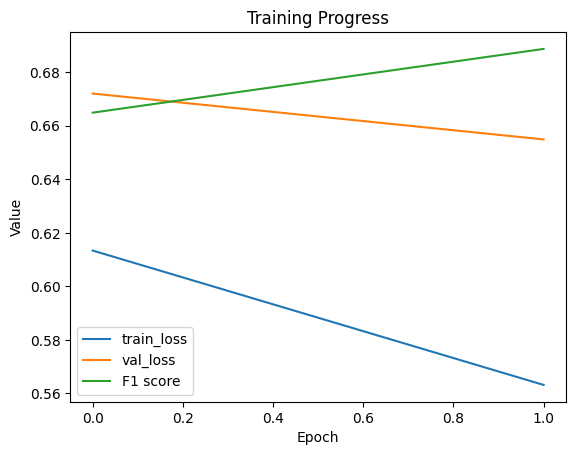

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.plot([report[i]["macro avg"]["f1-score"] for i in range(len(report))], label='F1 score')

plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.legend()
plt.show()

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned model
torch.save(best_model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_stereotype")

### Evaluation over tweets and news

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
best_model_stereotype = Model(dropout)
best_model_stereotype.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/model_stereotype"))
best_model_stereotype = best_model_stereotype.to(device)

Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
set_reproducibility(seed)
# preprocessing
_, _, _, _, X_test, X_test_news, y_test, y_test_news = preprocessing()
# tokenization
test_dataloader = tokenization(X_test, y_test, batch_size=batch_size)
test_news_dataloader = tokenization(X_test_news, y_test_news, batch_size=batch_size)

<ipython-input-59-8281d012cb31>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-59-8281d012cb31>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


In [ ]:
loss_tweets, report_tweets = val_fn(test_dataloader, best_model_stereotype, criterion)

print(f"\nTWEETS")
print(f"\nLoss: {loss_tweets}")

100%|██████████| 40/40 [00:01<00:00, 36.22it/s]


TWEETS

Loss: 0.6135020323097706


In [ ]:
loss_news, report_news = val_fn(test_news_dataloader, best_model_stereotype, criterion)

print(f"\nNEWS")
print(f"\nLoss: {loss_news}")

100%|██████████| 16/16 [00:00<00:00, 74.02it/s]


NEWS

Loss: 0.6645463462918997


### Error Analysis - Classification report

In [ ]:
pd.DataFrame(report_tweets).transpose()

,precision,recall,f1-score,support
0,0.760976,0.675325,0.715596,693.00000
1,0.652241,0.741652,0.694079,569.00000
accuracy,0.705230,0.705230,0.705230,0.70523
macro avg,0.706608,0.708488,0.704838,1262.00000
weighted avg,0.711950,0.705230,0.705895,1262.00000


In [ ]:
pd.DataFrame(report_news).transpose()

,precision,recall,f1-score,support
0,0.693512,0.956790,0.804150,324.000000
1,0.730769,0.217143,0.334802,175.000000
accuracy,0.697395,0.697395,0.697395,0.697395
macro avg,0.712141,0.586966,0.569476,499.000000
weighted avg,0.706578,0.697395,0.639549,499.000000


# TASK C - Identification of Nominal Utterances

## Download

In [ ]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import requests

In [ ]:
dev_df = pd.read_csv('/content/haspeede2_dev/haspeede2_dev_taskC.txt', sep='\t',
                     names=['TweetID-TokenNumber', 'token', 'IOB_annotation'], usecols=[0, 1, 2], header=0)

test_df = pd.read_csv('/content/haspeede2_reference/haspeede2_reference/haspeede2_reference_taskC-tweets.txt', sep='\t', names=['TweetID-TokenNumber', 'token', 'IOB_annotation'], usecols=[0, 1, 2], header=0)

test_df_news = pd.read_csv('/content/haspeede2_reference/haspeede2_reference/haspeede2_reference_taskC-news.txt', sep='\t', names=['TweetID-TokenNumber', 'token', 'IOB_annotation'], usecols=[0, 1, 2], header=0)

In [ ]:
row = []

with open('/content/haspeede2_dev/haspeede2_dev_taskC.txt') as txt:
  lines = filter(None, (line.rstrip() for line in txt)) #remove blank lines
  for line in lines:
    if not line.startswith('#') and not line.startswith(' '):
        row.append([word for word in line.strip().split('\t')])

dev_df = pd.DataFrame(row, columns=['id', 'token', 'IOB'])

row= []
with open('/content/haspeede2_reference/haspeede2_reference/haspeede2_reference_taskC-tweets.txt') as txt:
  lines = filter(None, (line.rstrip() for line in txt)) #remove blank lines
  for line in lines:
    if not line.startswith('#') and not line.startswith(' '):
        row.append([word for word in line.strip().split('\t')])

test_df = pd.DataFrame(row, columns=['id', 'token', 'IOB'])

dev_df.drop_duplicates(subset=['id'], inplace=True)
test_df.drop_duplicates(subset=['id'], inplace=True)

# separate tweet ID from token number
dev_df[['id', 'numb']] = dev_df.id.str.split('-', expand=True)
test_df[['id', 'numb']] = test_df.id.str.split('-', expand=True)

#reorder column
cols = ['id', 'numb', 'token', 'IOB']
dev_df = dev_df[cols]
test_df = test_df[cols]

dev_df.loc[dev_df.IOB == 'B-NU-CGA', 'IOB'] = 'B'
dev_df.loc[dev_df.IOB == 'I-NU-CGA', 'IOB'] = 'I'

test_df.loc[test_df.IOB == 'B-NU-CGA', 'IOB'] = 'B'
test_df.loc[test_df.IOB == 'I-NU-CGA', 'IOB'] = 'I'

In [ ]:
test_df.head()

,id,numb,token,IOB
0,11834,1,@,O
1,11834,2,user,O
2,11834,3,A,O
3,11834,4,me,O
4,11834,5,pare,O


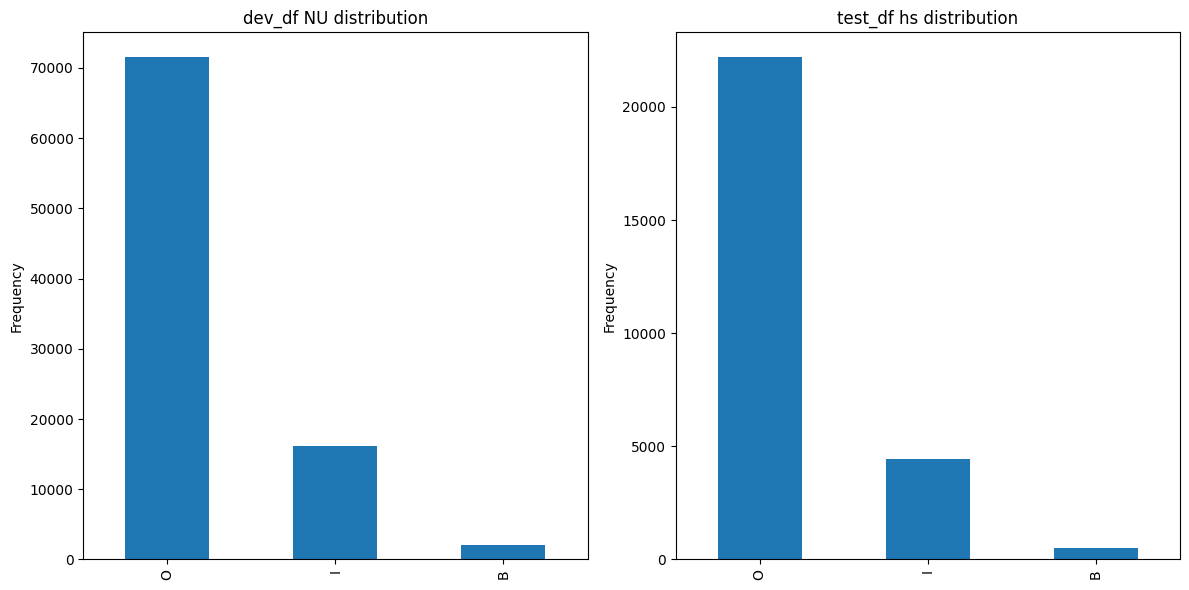

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

dev_df['IOB'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_title('dev_df NU distribution')

test_df['IOB'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_title('test_df hs distribution')

plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

def preprocessing(max_len, subset_len=None):

  def create_dataframe(df):
      groups = df.groupby('id')
      rows = []
      for name, group in groups:
          sentences = group['token'].tolist()
          iob = group['IOB'].tolist()
          rows.append([name, sentences, iob])
      return pd.DataFrame(rows, columns=['id', 'sentences', 'IOB'])

  new_df = create_dataframe(dev_df)[:subset_len] if subset_len else create_dataframe(dev_df)
  new_df_test = create_dataframe(test_df)[:subset_len] if subset_len else create_dataframe(test_df)

  # preprocessing: lower case
  new_df["sentences"] = new_df["sentences"].apply(lambda x: [word.lower() for word in x])
  new_df_test["sentences"] = new_df_test["sentences"].apply(lambda x: [word.lower() for word in x])

  # truncate the head of > max_len sentences 
  new_df["sentences"] = new_df["sentences"].apply(lambda x: x[-max_len:] if len(x) > max_len else x)
  new_df_test["sentences"] = new_df_test["sentences"].apply(lambda x: x[-max_len:] if len(x) > max_len else x)

  # split
  training_samp, val_samp = train_test_split(new_df["id"].unique(), test_size=0.2, shuffle=True)
  X_train, y_train = new_df[new_df['id'].isin(training_samp)]['sentences'], new_df[new_df['id'].isin(training_samp)]['IOB']
  X_val, y_val = new_df[new_df['id'].isin(val_samp)]['sentences'], new_df[new_df['id'].isin(val_samp)]['IOB']
  X_test, y_test = new_df_test['sentences'], new_df_test['IOB']

  return X_train, y_train, X_val, y_val, X_test, y_test

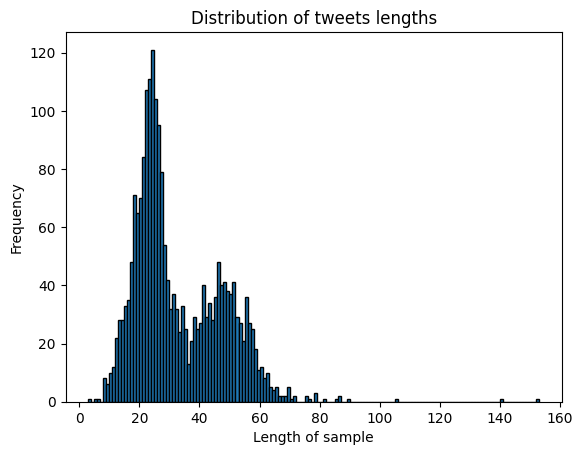

In [ ]:
temp, _, _, _, _, _, = preprocessing(256)
lengths = [len(s) for s in temp]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of tweets lengths')
plt.show()

## Tokenization

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
from transformers import BertTokenizer

label_map = {'O': 0, 'B': 1, 'I': 2, 'PAD': 3}

def tokenization(X, y, max_len, batch_size, tokenizer=None):
  if tokenizer is None:
      tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-italian-uncased')

  input_ids = []
  attention_masks = []
  label_ids = []
  for text, label in zip(X, y):
    encoded_dict = tokenizer.encode_plus(
        text,                      
        max_length=max_len,      
        pad_to_max_length=True,
        return_attention_mask=True,
        truncation=True,
        padding='max_length'
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

    # Add the PAD label at the beginning and end of the label list
    label_ids_list = [label_map['PAD']] + [label_map[l] for l in label] + [label_map['PAD']]
    # Pad the label list to the maximum length
    label_ids_list = label_ids_list[:max_len] + [label_map['PAD']] * (max_len - len(label_ids_list))

    
    label_ids.append(torch.tensor(label_ids_list))
    
  input_ids = torch.tensor(input_ids)
  attention_masks = torch.tensor(attention_masks)
  label_ids = torch.stack(label_ids)

  dataset = TensorDataset(input_ids, attention_masks, label_ids)
  sampler = RandomSampler(dataset)
  dataloader = DataLoader(dataset, sampler=sampler, batch_size=batch_size)

  return dataloader


## Model & functions

In [ ]:
from transformers import AutoModel

class Model(torch.nn.Module):
  def __init__(self, dropout, num_labels):
    super(Model, self).__init__()
    self.bert = AutoModel.from_pretrained("dbmdz/bert-base-italian-uncased")
    for param in self.bert.parameters():
        param.requires_grad = True
    self.dropout = torch.nn.Dropout(dropout)
    self.classifier = torch.nn.Linear(self.bert.config.hidden_size, num_labels)

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
    sequence_output = outputs.last_hidden_state
    sequence_output = self.dropout(sequence_output)
    logits = self.classifier(sequence_output)
    return logits


In [ ]:
from tqdm import tqdm

def train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs, num_labels=None):
  early_stopping = EarlyStopping(patience=int(num_epochs * 0.1))
  train_losses = []
  val_losses = []
  reports = []
  for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    
    # Train on training set
    train_loss = train_fn(train_dataloader, model, criterion, num_labels, optimizer)

    # Evaluate on validation set
    val_loss, report = val_fn(val_dataloader, model, criterion, num_labels)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    reports.append(report)

    # Check early stopping
    if early_stopping.step(val_losses[-1]):
      break

  return train_losses, val_losses, reports     

In [ ]:
def train_fn(data_loader, model, criterion, num_labels, optimizer):
  model.train()
  train_loss = 0

  for batch in tqdm(data_loader):
    ids, mask, labels = batch   
    optimizer.zero_grad()

    logits = model(ids.to(device), mask.to(device))
    
    loss = criterion(logits.cpu().view(-1, num_labels), labels.cpu().view(-1))
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  return train_loss/len(data_loader)

In [ ]:
from sklearn.metrics import classification_report

def val_fn(data_loader, model, criterion, num_labels):
  model.eval()

  val_loss, predictions, true_labels = 0, [], []

  with torch.no_grad():
    for batch in tqdm(data_loader):
      ids, mask, labels = batch   
      
      # Forward pass
      logits = model(ids.to(device), mask.to(device))
      
      loss = criterion(logits.cpu().view(-1, num_labels), labels.cpu().view(-1))
      val_loss += loss.item()      
      val_prediction = torch.argmax(logits.cpu(), axis=2).cpu().numpy()
      actual = labels.cpu().numpy()

      predictions.append(val_prediction)
      true_labels.append(actual)

  predictions = np.concatenate(predictions, axis=0)
  true_labels = np.concatenate(true_labels, axis=0)
  val_loss /= len(data_loader)
  report = classification_report(true_labels.flatten(), predictions.flatten(), labels=[1, 2], zero_division=0, output_dict=True)
  
  return val_loss, report

## GridSearch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter grid
max_len = 140
num_labels = len(label_map)
num_epochs = 20
lr = 1e-5 
seeds = [42, 12321]
batch_sizes = [32, 64]
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

results_df = pd.DataFrame(columns=["learning_rate", "seed", "batch_size", "dropout_rate", "val_loss", "precision", "recall", "f1_score"])

for seed in seeds:
  set_reproducibility(seed)
  # preprocessing
  X_train, y_train, X_val, y_val, _, _ = preprocessing(max_len,subset_len=2500)

  for batch_size in batch_sizes:
    # tokenization
    train_dataloader = tokenization(X_train, y_train, max_len, batch_size )
    val_dataloader = tokenization(X_val, y_val, max_len, batch_size)

    for dropout in dropout_rate:
      # model, criterion, optimizer
      model = Model(dropout, num_labels).to(device)
      criterion = torch.nn.CrossEntropyLoss()
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
      
      print(f"Running: seed: {seed}, batch_size: {batch_size}, dropout: {dropout}")
      _, losses, reports = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs, num_labels)

      results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)

Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.2
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.21it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 12.92it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 12.91it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.29it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 13.09it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.3
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.16it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.16it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.12it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 12.58it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 12.78it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.08it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.4
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.04it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.16it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 12.81it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.03it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.20it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.10it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.09it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 13.03it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.5
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.03it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.08it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.08it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 12.95it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 12.82it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.19it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.6
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.17it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.04it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 12.96it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 12.84it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.05it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 13.16it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.7
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 12.89it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.02it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.19it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.04it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.09it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 12.83it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 12.43it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 12.47it/s]


Epoch 11


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 32, dropout: 0.8
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.12it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.05it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.05it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 12.98it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.02it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 12.97it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 12.90it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.2
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.71it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 15


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.3
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.64it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.75it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.67it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.4
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.89it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.75it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.68it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.87it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.5
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.71it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.6
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.85it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.68it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.75it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.75it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.69it/s]


Epoch 15


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.7
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.84it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.87it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.75it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.69it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.72it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 42, batch_size: 64, dropout: 0.8
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.66it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.84it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.2
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 12.77it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 12.94it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.30it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.04it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.20it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 12.92it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 12.85it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.3
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.15it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.15it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.18it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.15it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 12.91it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.08it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.4
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.16it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.04it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 12.92it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.03it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.09it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.04it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 12.98it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.5
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 12.94it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.07it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.17it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.24it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 12.94it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.10it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.18it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 13.05it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.6
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.18it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.24it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 12.88it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 12.95it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.21it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.7
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 12.91it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 12.99it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.02it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 13.11it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 13.12it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.17it/s]


Epoch 9


100%|██████████| 16/16 [00:01<00:00, 12.97it/s]


Epoch 10


100%|██████████| 16/16 [00:01<00:00, 13.10it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 32, dropout: 0.8
Epoch 1


100%|██████████| 16/16 [00:01<00:00, 13.20it/s]


Epoch 2


100%|██████████| 16/16 [00:01<00:00, 13.14it/s]


Epoch 3


100%|██████████| 16/16 [00:01<00:00, 13.10it/s]


Epoch 4


100%|██████████| 16/16 [00:01<00:00, 13.16it/s]


Epoch 5


100%|██████████| 16/16 [00:01<00:00, 12.96it/s]


Epoch 6


100%|██████████| 16/16 [00:01<00:00, 12.82it/s]


Epoch 7


100%|██████████| 16/16 [00:01<00:00, 13.17it/s]


Epoch 8


100%|██████████| 16/16 [00:01<00:00, 13.09it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.2
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.3
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.70it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.69it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.86it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.53it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.4
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.45it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.75it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.68it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.72it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.5
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.87it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.85it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 15


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 16


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 17


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 18


100%|██████████| 8/8 [00:01<00:00,  6.74it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.6
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.86it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.69it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.64it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.7
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.72it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.73it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.84it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.81it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.79it/s]
<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running: seed: 12321, batch_size: 64, dropout: 0.8
Epoch 1


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 2


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 3


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 4


100%|██████████| 8/8 [00:01<00:00,  6.71it/s]


Epoch 5


100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


Epoch 6


100%|██████████| 8/8 [00:01<00:00,  6.84it/s]


Epoch 7


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 8


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 9


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 10


100%|██████████| 8/8 [00:01<00:00,  6.80it/s]


Epoch 11


100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


Epoch 12


100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


Epoch 13


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 14


100%|██████████| 8/8 [00:01<00:00,  6.69it/s]


terminating because of early stopping!


<ipython-input-56-14f58ab9c78c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "precision": reports[-1]["macro avg"]["precision"], "recall": reports[-1]["macro avg"]["recall"], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


In [ ]:
# Get row with max f1_score
max_f1_row = results_df.loc[results_df['f1_score'].idxmax()]

# Get row with lowest val_loss
min_val_loss_row = results_df.loc[results_df['val_loss'].idxmin()]

print(f"Model with the higher f1_score ({max_f1_row['f1_score']:.3f}): seed: {max_f1_row['seed']}, batch_size: {max_f1_row['batch_size']}, dropout rate: {max_f1_row['dropout_rate']:.3f} and loss: {max_f1_row['val_loss']:.3f}\nModel with the lowest loss ({min_val_loss_row['val_loss']:.3f}): seed: {min_val_loss_row['seed']}, batch_size: {min_val_loss_row['batch_size']}, dropout rate: {min_val_loss_row['dropout_rate']:.3f} and f1_score: {min_val_loss_row['f1_score']:.3f}")


Model with the higher f1_score (0.680): seed: 12321.0, batch_size: 32.0, dropout rate: 0.500 and loss: 0.079
Model with the lowest loss (0.073): seed: 12321.0, batch_size: 64.0, dropout rate: 0.200 and f1_score: 0.654


In [ ]:
results_df

,learning_rate,seed,batch_size,dropout_rate,val_loss,precision,recall,f1_score
0,0.00001,42.0,32.0,0.2,0.083900,0.678348,0.588214,0.629988
1,0.00001,42.0,32.0,0.3,0.078603,0.667590,0.660866,0.663161
2,0.00001,42.0,32.0,0.4,0.080332,0.751822,0.604826,0.669353
3,0.00001,42.0,32.0,0.5,0.083670,0.738779,0.491603,0.587849
4,0.00001,42.0,32.0,0.6,0.086471,0.673052,0.589089,0.623597
5,0.00001,42.0,32.0,0.7,0.086406,0.714633,0.599340,0.651593
6,0.00001,42.0,32.0,0.8,0.082183,0.705580,0.564828,0.617864
7,0.00001,42.0,64.0,0.2,0.087322,0.786008,0.516412,0.622977
8,0.00001,42.0,64.0,0.3,0.078960,0.708133,0.596872,0.645259
9,0.00001,42.0,64.0,0.4,0.079042,0.703251,0.436186,0.492993


## Train and Test with best hyperparameters

In [ ]:
# Hyperparameters
max_len = 140
num_labels = len(label_map)
lr = 1e-5 
seed = 12321
batch_size = 64
dropout = 0.2

### Train

In [ ]:
set_reproducibility(seed)
# preprocessing
X_train, y_train, X_val, y_val, _, _ = preprocessing(max_len)
# tokenization
train_dataloader = tokenization(X_train, y_train, max_len, batch_size)
val_dataloader = tokenization(X_val, y_val, max_len, batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model, criterion, optimizer
best_model = Model(dropout, num_labels).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(best_model.parameters(), lr=lr)

train_loss, val_loss, reports = train_model(best_model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=40, num_labels=num_labels)

Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 9/9 [00:00<00:00,  9.64it/s]


Epoch 2


100%|██████████| 9/9 [00:00<00:00,  9.60it/s]


Epoch 3


100%|██████████| 9/9 [00:00<00:00,  9.62it/s]


Epoch 4


100%|██████████| 9/9 [00:00<00:00,  9.62it/s]


Epoch 5


100%|██████████| 9/9 [00:00<00:00,  9.64it/s]


Epoch 6


100%|██████████| 9/9 [00:00<00:00,  9.62it/s]


Epoch 7


100%|██████████| 9/9 [00:00<00:00,  9.62it/s]


Epoch 8


100%|██████████| 9/9 [00:00<00:00,  9.61it/s]


Epoch 9


100%|██████████| 9/9 [00:00<00:00,  9.60it/s]


Epoch 10


100%|██████████| 9/9 [00:00<00:00,  9.64it/s]


Epoch 11


100%|██████████| 9/9 [00:00<00:00,  9.60it/s]


Epoch 12


100%|██████████| 9/9 [00:00<00:00,  9.62it/s]


Epoch 13


100%|██████████| 9/9 [00:00<00:00,  9.64it/s]


Epoch 14


100%|██████████| 9/9 [00:00<00:00,  9.62it/s]


terminating because of early stopping!


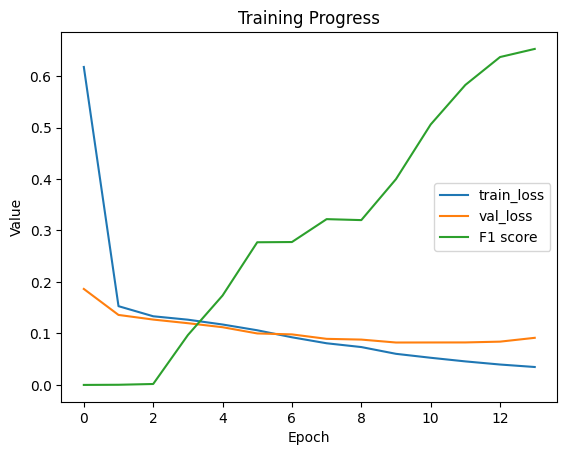

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.plot([reports[i]["macro avg"]["f1-score"] for i in range(len(reports))], label='F1 score')

plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.legend()
plt.show()

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned model
torch.save(best_model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_NU")

### Evaluation

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
best_model_NU = Model(dropout, num_labels)
best_model_NU.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/model_NU"))
best_model_NU = best_model_NU.to(device)

Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
set_reproducibility(seed)
# preprocessing
_, _, _, _, X_test, y_test = preprocessing(max_len=max_len)
# tokenization
test_dataloader = tokenization(X_test, y_test, max_len=max_len, batch_size=batch_size)

In [ ]:
loss, report = val_fn(test_dataloader, best_model_NU, criterion, num_labels)

print(f"\nLoss: {loss}")

100%|██████████| 10/10 [00:01<00:00,  7.15it/s]


Loss: 0.13655324429273605


### Error Analysis - Classification report

In [ ]:
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
1,0.626214,0.504892,0.559047,511.0
2,0.686326,0.587104,0.632850,4420.0
micro avg,0.680420,0.578584,0.625384,4931.0
macro avg,0.656270,0.545998,0.595948,4931.0
weighted avg,0.680097,0.578584,0.625201,4931.0


# Project work

## Spanish 

### Download

In [ ]:
url1 = 'https://datacloud.di.unito.it/index.php/s/eMZdFYq6yRP3zeL/download/hateval2019.zip?raw=true'
pwd = b"2019hateval"  

resp = urlopen(url1)
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.extractall('/content/haspeede_spanish', pwd=pwd)

In [ ]:
train_df = pd.read_csv('/content/haspeede_spanish/hateval2019_es_train.csv', sep=',',
                     names=['id', 'text', 'hs', 'tr', 'ag'], usecols=[0, 1, 2, 3, 4], header=0)

dev_df = pd.read_csv('/content/haspeede_spanish/hateval2019_es_dev.csv', sep=',',
                     names=['id', 'text', 'hs', 'tr', 'ag'], usecols=[0, 1, 2, 3, 4], header=0)

test_df = pd.read_csv('/content/haspeede_spanish/hateval2019_es_test.csv', sep=',',
                     names=['id', 'text', 'hs', 'tr', 'ag'], usecols=[0, 1, 2, 3, 4], header=0)


In [ ]:
train_df.head()

,id,text,hs,tr,ag
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [ ]:
print(train_df.shape)
print(dev_df.shape)
print(test_df.shape)

(4500, 5)
(500, 5)
(1600, 5)


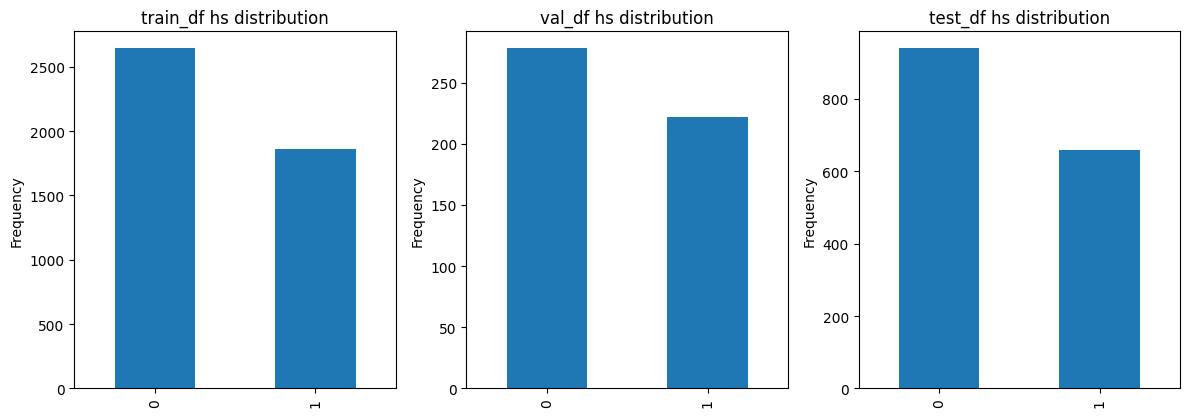

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

train_df['hs'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('train_df hs distribution')

dev_df['hs'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('val_df hs distribution')

test_df['hs'].value_counts().plot(kind='bar', ax=axs[0, 2])
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('test_df hs distribution')

axs[1, 0].remove()
axs[1, 1].remove()
axs[1, 2].remove()

plt.tight_layout()
plt.show()

### Preprocessing

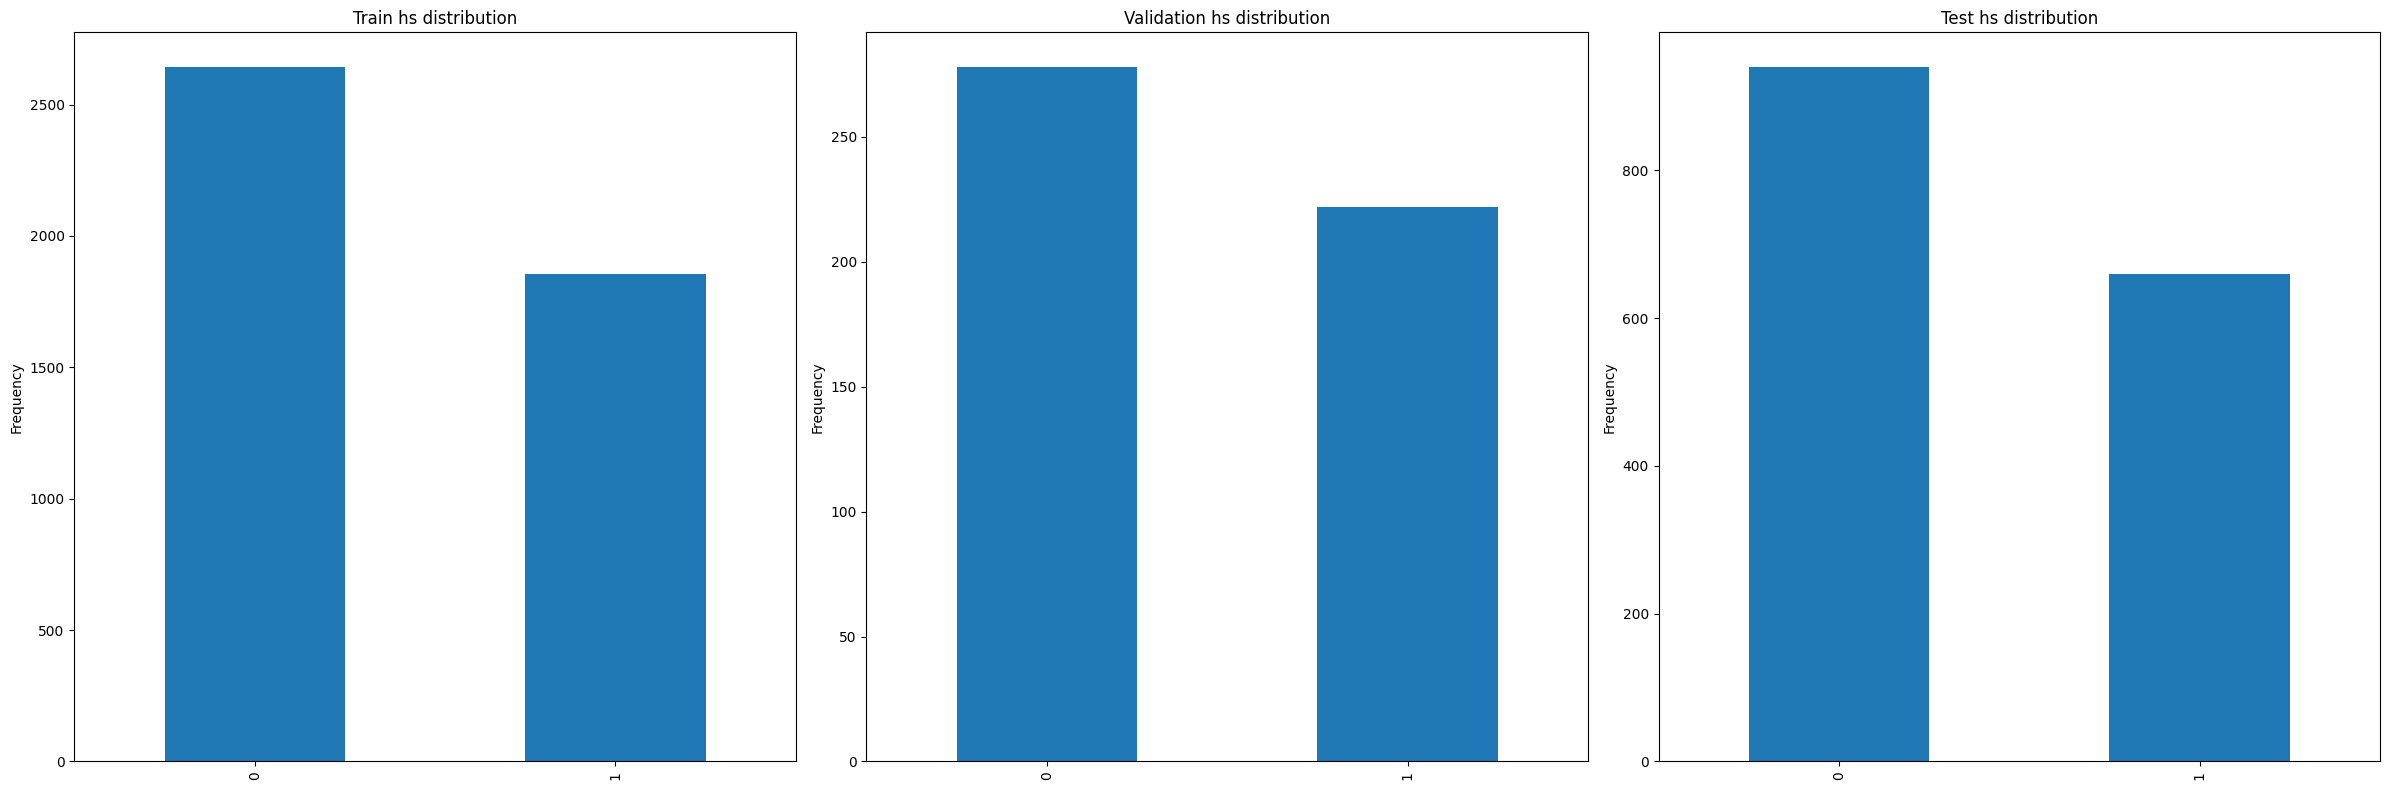

Ratio positive/negative in train set
Positive: 41.27%
Negative: 58.73%
Ratio positive/negative in val set
Positive: 44.40%
Negative: 55.60%
Ratio positive/negative in test set
Positive: 41.25%
Negative: 58.75%


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_train = train_df['text']
y_train = train_df['hs']

X_val = dev_df['text']
y_val = dev_df['hs']

X_test = test_df['text']
y_test = test_df['hs']

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

y_train.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train hs distribution')

y_val.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_title('Validation hs distribution')

y_test.value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_ylabel('Frequency')
axs[2].set_title('Test hs distribution')

plt.tight_layout()
plt.show()

num_positives = sum(y_train)
num_negatives = len(y_train) - num_positives

positive_ratio_train = (num_positives / len(y_train)) * 100
negative_ratio_train = (num_negatives / len(y_train)) * 100

print(f"Ratio positive/negative in train set")
print(f"Positive: {positive_ratio_train:.2f}%")
print(f"Negative: {negative_ratio_train:.2f}%")

num_positives = sum(y_val)
num_negatives = len(y_val) - num_positives

positive_ratio_val = (num_positives / len(y_val)) * 100
negative_ratio_val = (num_negatives / len(y_val)) * 100

print(f"Ratio positive/negative in val set")
print(f"Positive: {positive_ratio_val:.2f}%")
print(f"Negative: {negative_ratio_val:.2f}%")

num_positives = sum(y_test)
num_negatives = len(y_test) - num_positives

positive_ratio_test = (num_positives / len(y_test)) * 100
negative_ratio_test = (num_negatives / len(y_test)) * 100

print(f"Ratio positive/negative in test set")
print(f"Positive: {positive_ratio_test:.2f}%")
print(f"Negative: {negative_ratio_test:.2f}%")

In [ ]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
import re

sw = stopwords.words('spanish')
stemmer = SnowballStemmer("spanish")

def preprocess_tweet(tweet):
  # convert to lowercase
  tweet = tweet.lower()
  # remove URLs
  tweet = tweet.replace('url', '')
  # remove mentions
  tweet = re.sub(r'@\w+', '', tweet)
  # remove non-alphanumeric characters
  tweet = re.sub(r'[^\w\s]', ' ', tweet)
  # remove duplicate whitespace and stopwords
  tweet = ' '.join([word for word in tweet.split() if not word in sw])

  return tweet

X_train = X_train.apply(preprocess_tweet)

X_val = X_val.apply(preprocess_tweet)

X_test = X_test.apply(preprocess_tweet)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


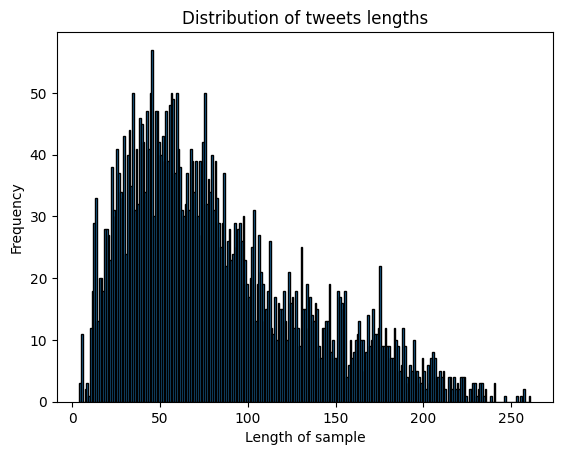

In [ ]:
lengths = [len(s) for s in X_train]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of tweets lengths')
plt.show()

### Tokenization

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AutoTokenizer

def tokenization(X, y, batch_size, tokenizer=None):
  if tokenizer is None:
      tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased")
  
  max_length = 256      
  
  encoding = tokenizer.batch_encode_plus(list(X), max_length=max_length, padding=True, truncation=True)      
  
  input_ids = torch.tensor(encoding['input_ids'])
  attention_mask = torch.tensor(encoding['attention_mask'])
  
  inputs = torch.tensor(input_ids)
  mask = torch.tensor(attention_mask)
  labels = torch.tensor(list(y))

  data = TensorDataset(inputs, mask, labels)
  sampler = RandomSampler(data)
  dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)

  return dataloader

### Model & functions

In [ ]:
from transformers import AutoModel
import torch

class Model(torch.nn.Module):
    def __init__(self, dropout):
        super(Model, self).__init__()
        self.bert = AutoModel.from_pretrained("dccuchile/distilbert-base-spanish-uncased")
        for param in self.bert.parameters():
            param.requires_grad = True
        self.dropout = torch.nn.Dropout(dropout)
        self.linear = torch.nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
        last_hidden_state = outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_state, dim=1)
        pooled_output = self.dropout(pooled_output)
        logits = self.linear(pooled_output)
        return logits

In [ ]:
from tqdm import tqdm

def train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs):
  early_stopping = EarlyStopping(patience=int(num_epochs * 0.1))
  train_losses = []
  val_losses = []
  reports = []
  for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    
    # Train on training set
    train_loss = train_fn(train_dataloader, model, criterion, optimizer)

    # Evaluate on validation set
    val_loss, report = val_fn(val_dataloader, model, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    reports.append(report)

    # Check early stopping
    if early_stopping.step(val_losses[-1]):
      break

  return train_losses, val_losses, reports     

In [ ]:
def train_fn(data_loader, model, criterion, optimizer):
  # Train on training set
  model.train()
  train_loss = 0

  for batch in tqdm(data_loader):
    ids, mask, labels = batch   
    optimizer.zero_grad()

    # Forward pass
    outputs = model(ids.to(device), mask.to(device))
    outputs = outputs.squeeze()
    loss = criterion(outputs.cpu(), labels.type_as(outputs).cpu())
    train_loss += loss.item()  

    # Backward pass
    loss.backward()
    optimizer.step()

  return train_loss / len(data_loader)  


In [ ]:
from sklearn.metrics import classification_report

def val_fn(data_loader, model, criterion):
  model.eval()
  val_loss, predictions, true_labels = 0, [], []
    
  with torch.no_grad():
    for batch in tqdm(data_loader):
      ids, mask, labels = batch
      labels = labels.unsqueeze(1)
      
      # Forward pass
      outputs = model(ids.to(device), mask.to(device))
      loss = criterion(outputs.cpu(), labels.float().cpu())
      val_loss += loss.item()

      preds = (torch.sigmoid(outputs) > 0.5).float()
      predictions.append(preds)
      true_labels.append(labels)

  predictions = torch.cat(predictions, dim=0)
  true_labels = torch.cat(true_labels, dim=0)
  val_loss /= len(data_loader)
  report = classification_report(true_labels.cpu(), predictions.cpu(), labels=[0, 1], zero_division=0, output_dict=True)

  return val_loss, report

### GridSearch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter grid
seeds = [42, 12321]
num_epochs = 20
lr = 1e-5 
batch_sizes = [32, 64]
pos_weight = torch.tensor([1.4])
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

results_df = pd.DataFrame(columns=["learning_rate", "pos_weight", "seed", "batch_size", "dropout_rate", "val_loss", "f1_score"])

# Loop over the hyperparameter grid
for seed in seeds:
  set_reproducibility(seed)
  
  for batch_size in batch_sizes:
    # tokenization
    train_dataloader = tokenization(X_train, y_train, batch_size)
    val_dataloader = tokenization(X_val, y_val, batch_size)

    for dropout in dropout_rate:
      # model, criterion, optimizer
      model = Model(dropout).to(device)
      criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
      
      _, losses, reports = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=num_epochs)

      results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


<ipython-input-23-e316fa21d38f>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-23-e316fa21d38f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 71.10it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.93it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 72.82it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.30it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 72.88it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.43it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 73.52it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.45it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 72.66it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 73.03it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 73.15it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.17it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 72.89it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.01it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 73.71it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.59it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.89it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 70.35it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 72.69it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 72.88it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.78it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.72it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 71.33it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.05it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 72.68it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 72.00it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 73.32it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.04it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.44it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 72.82it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 72.78it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.36it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.93it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 72.63it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.06it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 72.71it/s]


Epoch 6


100%|██████████| 16/16 [00:00<00:00, 70.60it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-23-e316fa21d38f>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-23-e316fa21d38f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequence

Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.13it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.79it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.73it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.68it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.57it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.81it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.98it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.86it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.80it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.76it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.89it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.83it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.67it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.70it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.87it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.71it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.52it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 42.14it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.85it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.61it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.59it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.79it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.71it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.77it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.65it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.80it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 42.11it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.90it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.55it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.60it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.84it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.77it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 40.98it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.62it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.78it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.73it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.70it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.07it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-23-e316fa21d38f>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-23-e316fa21d38f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequence

Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.92it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.76it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.00it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 74.07it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 74.18it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 73.03it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.80it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.16it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.07it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.59it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.15it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 72.77it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.93it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.73it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 72.63it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.32it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 73.37it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 72.77it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 74.51it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 69.87it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 73.57it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.99it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 71.80it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.42it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 73.18it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 73.11it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 72.82it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 73.46it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 73.21it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 72.74it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 69.82it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-23-e316fa21d38f>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-23-e316fa21d38f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequence

Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.85it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.75it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 42.06it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.54it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.78it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.86it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.87it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 40.53it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.20it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.70it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.71it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.61it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.79it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.72it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.81it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.78it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.94it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.73it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.78it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.77it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.77it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.91it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.67it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.71it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.57it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.84it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 40.91it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.58it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.87it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.70it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.96it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.49it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.71it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.73it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.73it/s]
<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 8/8 [00:00<00:00, 41.31it/s]


Epoch 2


100%|██████████| 8/8 [00:00<00:00, 41.50it/s]


Epoch 3


100%|██████████| 8/8 [00:00<00:00, 41.86it/s]


Epoch 4


100%|██████████| 8/8 [00:00<00:00, 41.86it/s]


Epoch 5


100%|██████████| 8/8 [00:00<00:00, 41.76it/s]


Epoch 6


100%|██████████| 8/8 [00:00<00:00, 41.74it/s]


terminating because of early stopping!


<ipython-input-28-384784649742>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


In [ ]:
# Get row with max f1_score
max_f1_row = results_df.loc[results_df['f1_score'].idxmax()]

# Get row with lowest val_loss
min_val_loss_row = results_df.loc[results_df['val_loss'].idxmin()]

print(f"Model with the higher f1_score ({max_f1_row['f1_score']:.3f}): seed: {max_f1_row['seed']}, batch_size: {max_f1_row['batch_size']}, dropout rate: {max_f1_row['dropout_rate']:.3f} and loss: {max_f1_row['val_loss']:.3f}\nModel with the lowest loss ({min_val_loss_row['val_loss']:.3f}): seed: {min_val_loss_row['seed']}, batch_size: {min_val_loss_row['batch_size']}, dropout rate: {min_val_loss_row['dropout_rate']:.3f} and f1_score: {min_val_loss_row['f1_score']:.3f}")


Model with the higher f1_score (0.832): seed: 42, batch_size: 64, dropout rate: 0.300 and loss: 0.494
Model with the lowest loss (0.486): seed: 12321, batch_size: 32, dropout rate: 0.500 and f1_score: 0.821


In [ ]:
results_df

,learning_rate,pos_weight,seed,batch_size,dropout_rate,val_loss,f1_score
0,0.00001,[tensor(1.4000)],42,32,0.2,0.552491,0.813534
1,0.00001,[tensor(1.4000)],42,32,0.3,0.544168,0.823718
2,0.00001,[tensor(1.4000)],42,32,0.4,0.548623,0.816514
3,0.00001,[tensor(1.4000)],42,32,0.5,0.544503,0.823718
4,0.00001,[tensor(1.4000)],42,32,0.6,0.597022,0.823182
5,0.00001,[tensor(1.4000)],42,32,0.7,0.519512,0.824822
6,0.00001,[tensor(1.4000)],42,32,0.8,0.581694,0.805962
7,0.00001,[tensor(1.4000)],42,64,0.2,0.546455,0.815932
8,0.00001,[tensor(1.4000)],42,64,0.3,0.493834,0.831731
9,0.00001,[tensor(1.4000)],42,64,0.4,0.517488,0.821399


### Traing and Test with best hyperparameters

In [ ]:
# hyperparameters
seed = 12321
lr = 1e-5 
pos_weight = torch.tensor([1.4])
batch_size = 32
dropout = 0.5

#### Train

In [ ]:
set_reproducibility(seed)

# tokenization
train_dataloader = tokenization(X_train, y_train, batch_size=batch_size)
val_dataloader = tokenization(X_val, y_val, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your model, criterion, optimizer
best_model = Model(dropout).to(device)

# Define your criterion, optimizer
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(best_model.parameters(), lr=lr)

# Train the model and validate loss, F1 score, and precision
train_loss, val_loss, report = train_model(best_model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=10)

<ipython-input-195-e316fa21d38f>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-195-e316fa21d38f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 16/16 [00:00<00:00, 71.77it/s]


Epoch 2


100%|██████████| 16/16 [00:00<00:00, 71.80it/s]


Epoch 3


100%|██████████| 16/16 [00:00<00:00, 72.70it/s]


Epoch 4


100%|██████████| 16/16 [00:00<00:00, 72.79it/s]


Epoch 5


100%|██████████| 16/16 [00:00<00:00, 72.82it/s]

terminating because of early stopping!


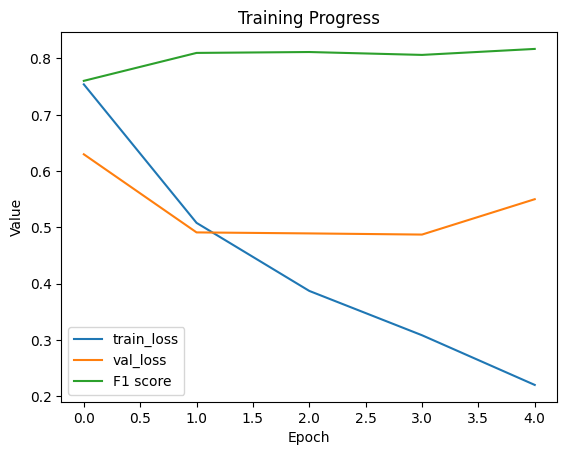

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.plot([report[i]["macro avg"]["f1-score"] for i in range(len(report))], label='F1 score')

plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.legend()
plt.show()

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned model
torch.save(best_model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_spanish_hs")

#### Evaluation

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
best_model_hs = Model(dropout)
best_model_hs.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/model_spanish_hs"))
best_model_hs = best_model_hs.to(device)


Some weights of the model checkpoint at dccuchile/distilbert-base-spanish-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
set_reproducibility(seed)

# tokenization
test_dataloader = tokenization(X_test, y_test, batch_size=batch_size)

criterion = torch.nn.BCEWithLogitsLoss()


<ipython-input-23-e316fa21d38f>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-23-e316fa21d38f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


In [ ]:
loss, report = val_fn(test_dataloader, best_model_hs, criterion)

print(f"\nLoss: {loss}")

100%|██████████| 50/50 [00:00<00:00, 63.44it/s]


Loss: 0.699141982793808


#### Error Analysis - Classification report

In [ ]:
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.842640,0.706383,0.768519,940.00
1,0.660099,0.812121,0.728261,660.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.751369,0.759252,0.748390,1600.00
weighted avg,0.767341,0.750000,0.751912,1600.00


## German

### Download

In [ ]:
!git clone https://github.com/UCSM-DUE/IWG_hatespeech_public

Cloning into 'IWG_hatespeech_public'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), 41.69 KiB | 948.00 KiB/s, done.


In [ ]:
df = pd.read_csv('/content/IWG_hatespeech_public/german hatespeech refugees.csv', sep=',',
                     names=['text', 'hs'], usecols=[0, 1], header=0)


In [ ]:
df.head()

,text,hs
0,#Rosenmontag ist abgesagt. #Rapefugees also wi...,YES
1,bitte nicht die #Türkei zum #EU-Mitglied mache...,NO
2,Wieso bekommen #rapefugees mehr als unsere Har...,NO
3,Den verfluchten #Rapefugees den Krieg erklären...,NO
4,War das Wochenende im Ruhrpott unterwegs. Über...,YES


In [ ]:
df['hs'] = df['hs'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
print(df.shape)

(469, 2)


<Axes: xlabel='hs distribution', ylabel='Frequency'>

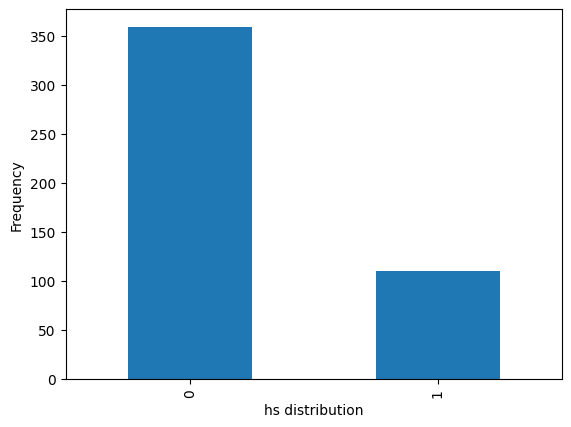

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['hs'].value_counts().plot(kind='bar', xlabel='hs distribution', ylabel='Frequency')


### Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
import re

def preprocessing(subset_len=None):
  if subset_len: 
    subset_len = min(len(df), subset_len)
    # Randomly subset
    temp_df = df.sample(n=subset_len)
  else:
    temp_df = df

  # Split dev_df into train and val
  X_train, X_val, y_train, y_val = train_test_split(temp_df['text'], temp_df['hs'], test_size=0.4)

  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

  sw = stopwords.words('german')
  stemmer = SnowballStemmer("german")

  def preprocess_tweet(tweet):
    # convert to lowercase
    tweet = tweet.lower()
    # remove URLs
    tweet = tweet.replace('url', '')
    # remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # remove non-alphanumeric characters
    tweet = re.sub(r'[^\w\s]', ' ', tweet)
    # remove duplicate whitespace and stopwords
    tweet = ' '.join([word for word in tweet.split() if not word in sw])

    return tweet

  X_train = X_train.apply(preprocess_tweet)

  X_val = X_val.apply(preprocess_tweet)

  X_test = X_test.apply(preprocess_tweet)
  
  return X_train, X_val, y_train, y_val, X_test, y_test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


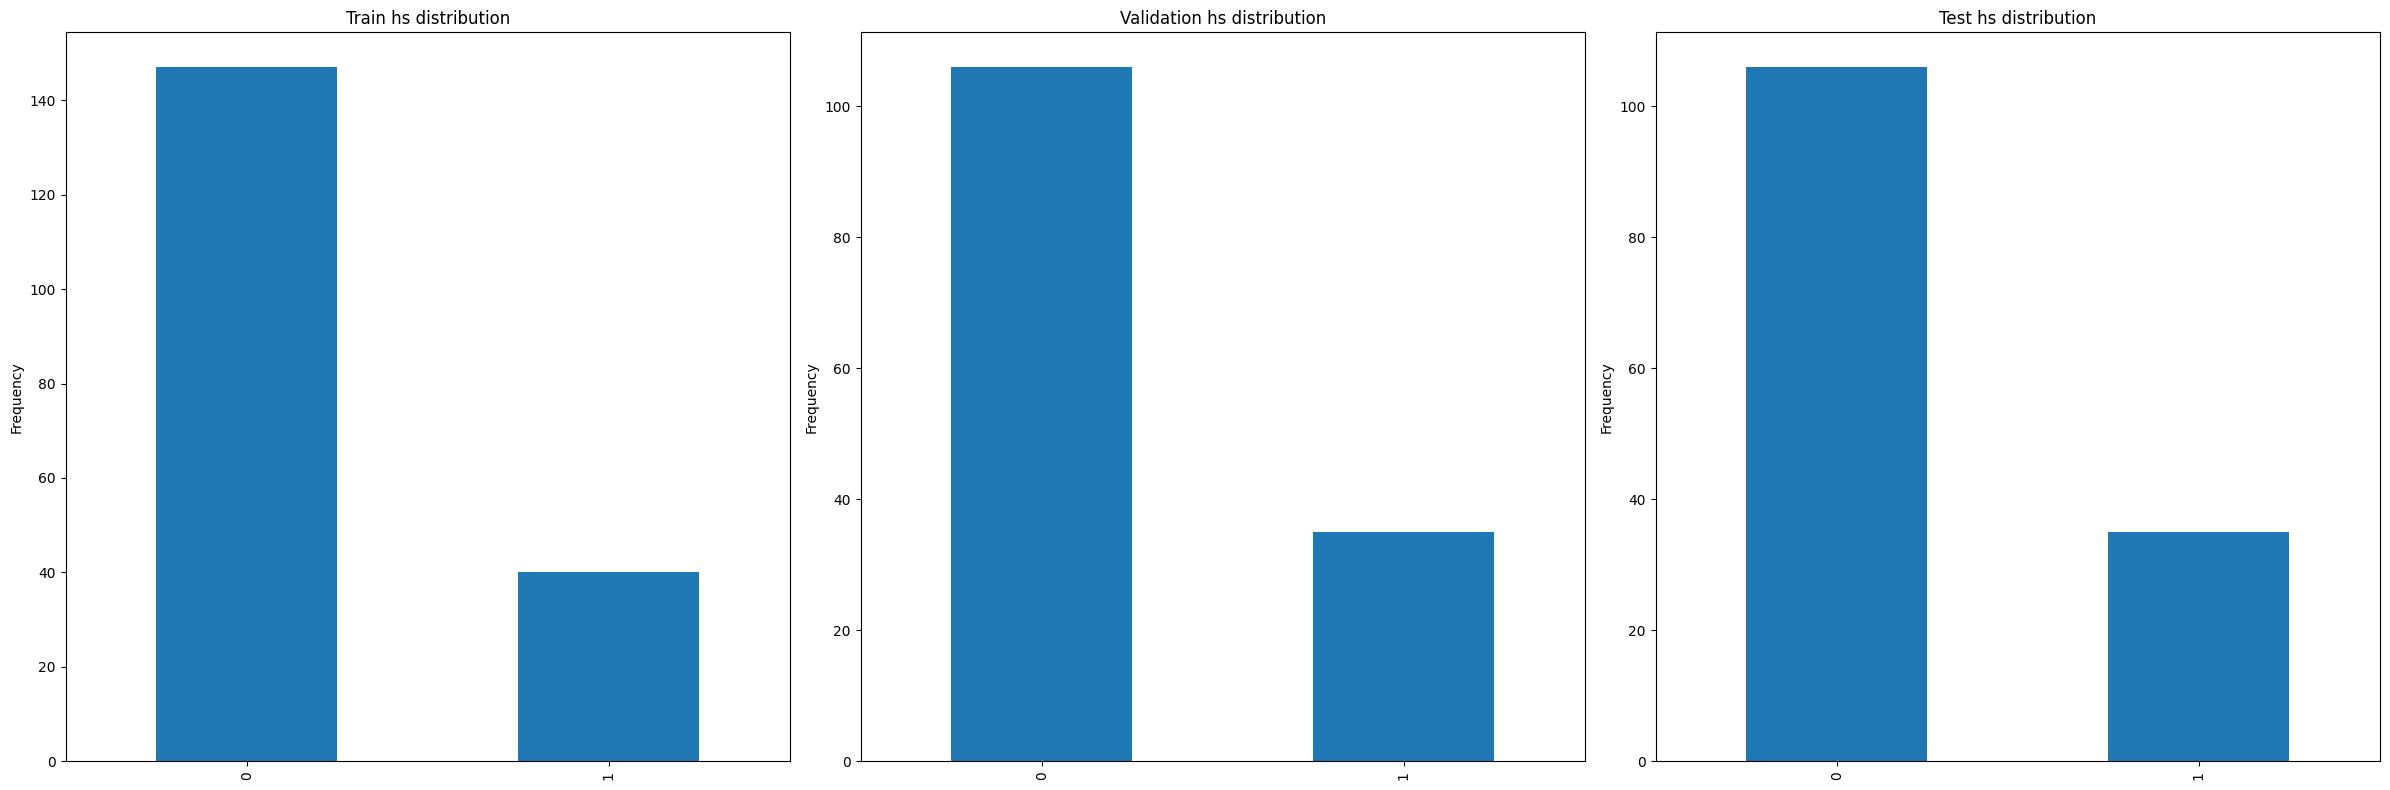

Ratio positive/negative in train set
Positive: 21.39%
Negative: 78.61%
Ratio positive/negative in val set
Positive: 24.82%
Negative: 75.18%
Ratio positive/negative in test set
Positive: 24.82%
Negative: 75.18%


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_df = df['text']
y_df = df['hs']

# split dev_df into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.6)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

y_train.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train hs distribution')

y_val.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_title('Validation hs distribution')

y_test.value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_ylabel('Frequency')
axs[2].set_title('Test hs distribution')

plt.tight_layout()
plt.show()

num_positives = sum(y_train)
num_negatives = len(y_train) - num_positives

positive_ratio_train = (num_positives / len(y_train)) * 100
negative_ratio_train = (num_negatives / len(y_train)) * 100

print(f"Ratio positive/negative in train set")
print(f"Positive: {positive_ratio_train:.2f}%")
print(f"Negative: {negative_ratio_train:.2f}%")

num_positives = sum(y_val)
num_negatives = len(y_val) - num_positives

positive_ratio_val = (num_positives / len(y_val)) * 100
negative_ratio_val = (num_negatives / len(y_val)) * 100

print(f"Ratio positive/negative in val set")
print(f"Positive: {positive_ratio_val:.2f}%")
print(f"Negative: {negative_ratio_val:.2f}%")

num_positives = sum(y_test)
num_negatives = len(y_test) - num_positives

positive_ratio_test = (num_positives / len(y_test)) * 100
negative_ratio_test = (num_negatives / len(y_test)) * 100

print(f"Ratio positive/negative in test set")
print(f"Positive: {positive_ratio_test:.2f}%")
print(f"Negative: {negative_ratio_test:.2f}%")

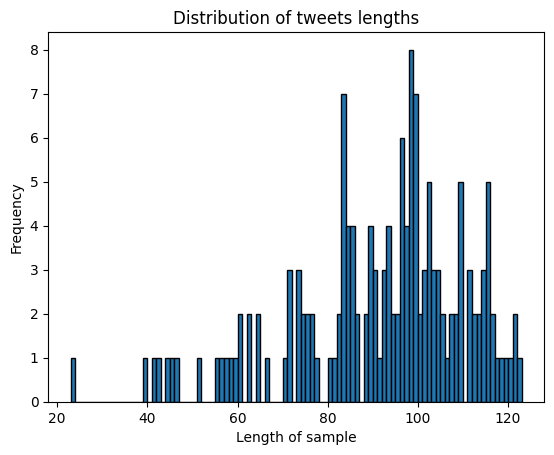

In [ ]:
temp, _, _, _, _, _, = preprocessing(256)
lengths = [len(s) for s in temp]

plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black')
plt.xlabel('Length of sample')
plt.ylabel('Frequency')
plt.title('Distribution of tweets lengths')
plt.show()

### Tokenization

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer

def tokenization(X, y, batch_size, tokenizer=None):
  if tokenizer is None:
      tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-german-uncased")
  
  max_length = 256      
  
  encoding = tokenizer.batch_encode_plus(list(X), max_length=max_length, padding=True, truncation=True)      
  
  input_ids = torch.tensor(encoding['input_ids'])
  attention_mask = torch.tensor(encoding['attention_mask'])
  
  inputs = torch.tensor(input_ids)
  mask = torch.tensor(attention_mask)
  labels = torch.tensor(list(y))

  data = TensorDataset(inputs, mask, labels)
  sampler = RandomSampler(data)
  dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)

  return dataloader

### Model & functions

In [ ]:
from transformers import AutoModel
import torch

class Model(torch.nn.Module):
  def __init__(self, dropout):
    super(Model, self).__init__()
    self.bert = AutoModel.from_pretrained("dbmdz/bert-base-german-uncased")
    for param in self.bert.parameters():
        param.requires_grad = True
    self.dropout = torch.nn.Dropout(dropout)
    self.linear = torch.nn.Linear(768, 1)

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
    pooled_output = outputs.pooler_output
    pooled_output = self.dropout(pooled_output)
    logits = self.linear(pooled_output)
    return logits

In [ ]:
from tqdm import tqdm

def train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs):
  early_stopping = EarlyStopping(patience=int(num_epochs * 0.1))
  train_losses = []
  val_losses = []
  reports = []
  for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    
    # Train on training set
    train_loss = train_fn(train_dataloader, model, criterion, optimizer)

    # Evaluate on validation set
    val_loss, report = val_fn(val_dataloader, model, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    reports.append(report)

    # Check early stopping
    if early_stopping.step(val_losses[-1]):
      break

  return train_losses, val_losses, reports     

In [ ]:
def train_fn(data_loader, model, criterion, optimizer):
  # Train on training set
  model.train()
  train_loss = 0

  for batch in tqdm(data_loader):
    ids, mask, labels = batch   
    optimizer.zero_grad()

    # Forward pass
    outputs = model(ids.to(device), mask.to(device))
    outputs = outputs.squeeze()
    loss = criterion(outputs.cpu(), labels.type_as(outputs).cpu())
    train_loss += loss.item()  

    # Backward pass
    loss.backward()
    optimizer.step()

  return train_loss / len(data_loader)  


In [ ]:
from sklearn.metrics import classification_report

def val_fn(data_loader, model, criterion):
  model.eval()
  val_loss, predictions, true_labels = 0, [], []
    
  with torch.no_grad():
    for batch in tqdm(data_loader):
      ids, mask, labels = batch
      labels = labels.unsqueeze(1)
      
      # Forward pass
      outputs = model(ids.to(device), mask.to(device))
      loss = criterion(outputs.cpu(), labels.float().cpu())
      val_loss += loss.item()

      preds = (torch.sigmoid(outputs) > 0.5).float()
      predictions.append(preds)
      true_labels.append(labels)

  predictions = torch.cat(predictions, dim=0)
  true_labels = torch.cat(true_labels, dim=0)
  val_loss /= len(data_loader)
  report = classification_report(true_labels.cpu(), predictions.cpu(), labels=[0, 1], zero_division=0, output_dict=True)

  return val_loss, report

### GridSearch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter grid
seeds = [42, 12321]
num_epochs = 20
lr = 1e-5 
batch_sizes = [32, 64]
pos_weight = torch.tensor([2.8])
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

results_df = pd.DataFrame(columns=["learning_rate", "pos_weight", "seed", "batch_size", "dropout_rate", "val_loss", "f1_score"])

# Loop over the hyperparameter grid
for seed in seeds:
  set_reproducibility(seed)
  # preprocessing
  X_train, X_val, y_train, y_val, X_test, y_test = preprocessing(2500)
  
  for batch_size in batch_sizes:
    # tokenization
    train_dataloader = tokenization(X_train, y_train, batch_size)
    val_dataloader = tokenization(X_val, y_val, batch_size)

    for dropout in dropout_rate:
      # model, criterion, optimizer
      model = Model(dropout).to(device)
      criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
      
      _, losses, reports = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=num_epochs)

      results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


<ipython-input-61-962963644a13>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-61-962963644a13>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from 

Epoch 1


100%|██████████| 3/3 [00:00<00:00, 48.88it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 49.15it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 48.20it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 49.37it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 48.65it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 47.71it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 48.12it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 48.83it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 48.27it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 47.42it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 48.12it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 49.21it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 48.03it/s]


Epoch 8


100%|██████████| 3/3 [00:00<00:00, 48.23it/s]


Epoch 9


100%|██████████| 3/3 [00:00<00:00, 48.54it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 47.85it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 48.31it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 47.40it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 48.16it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 51.90it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 47.34it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 48.90it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 47.46it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 48.97it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 48.31it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 49.43it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 48.49it/s]


Epoch 8


100%|██████████| 3/3 [00:00<00:00, 48.41it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 42.82it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 48.00it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 48.13it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 48.42it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 47.86it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 48.03it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 47.67it/s]


Epoch 8


100%|██████████| 3/3 [00:00<00:00, 47.68it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 48.30it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 49.17it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 48.91it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 50.06it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 48.68it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 47.85it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 48.29it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 47.94it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-61-962963644a13>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-61-962963644a13>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from 

Epoch 1


100%|██████████| 2/2 [00:00<00:00, 39.92it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 33.83it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 35.40it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 33.74it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 34.28it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 33.63it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 33.91it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 34.93it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 42.88it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 33.81it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 34.30it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 34.46it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 34.06it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 33.90it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 33.56it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 33.23it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 34.17it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 34.36it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 35.04it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 34.08it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 34.16it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 33.45it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 33.32it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 34.12it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 33.86it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 33.82it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 34.01it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 33.89it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 33.95it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 33.51it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 33.46it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 34.50it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 34.22it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 35.97it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 34.26it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-61-962963644a13>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-61-962963644a13>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from 

Epoch 1


100%|██████████| 3/3 [00:00<00:00, 42.62it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 43.05it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 43.09it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 43.52it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 43.83it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 43.87it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 43.61it/s]


Epoch 8


100%|██████████| 3/3 [00:00<00:00, 43.80it/s]


Epoch 9


100%|██████████| 3/3 [00:00<00:00, 43.14it/s]


Epoch 10


100%|██████████| 3/3 [00:00<00:00, 43.77it/s]


Epoch 11


100%|██████████| 3/3 [00:00<00:00, 43.93it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 43.64it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 43.48it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 44.17it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 43.89it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 44.36it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 43.58it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 43.42it/s]


Epoch 8


100%|██████████| 3/3 [00:00<00:00, 43.06it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 43.20it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 42.86it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 43.52it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 43.15it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 43.82it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 43.03it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 42.59it/s]


Epoch 8


100%|██████████| 3/3 [00:00<00:00, 43.59it/s]


Epoch 9


100%|██████████| 3/3 [00:00<00:00, 43.02it/s]


Epoch 10


100%|██████████| 3/3 [00:00<00:00, 42.98it/s]


Epoch 11


100%|██████████| 3/3 [00:00<00:00, 43.34it/s]


Epoch 12


100%|██████████| 3/3 [00:00<00:00, 43.18it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 43.48it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 43.44it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 42.45it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 43.36it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 45.00it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 43.53it/s]


Epoch 7


100%|██████████| 3/3 [00:00<00:00, 43.53it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 43.67it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 42.84it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 43.94it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 43.91it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 43.86it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 43.80it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 43.31it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 44.05it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 3/3 [00:00<00:00, 44.49it/s]


Epoch 2


100%|██████████| 3/3 [00:00<00:00, 43.11it/s]


Epoch 3


100%|██████████| 3/3 [00:00<00:00, 43.34it/s]


Epoch 4


100%|██████████| 3/3 [00:00<00:00, 44.35it/s]


Epoch 5


100%|██████████| 3/3 [00:00<00:00, 44.16it/s]


Epoch 6


100%|██████████| 3/3 [00:00<00:00, 44.12it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


<ipython-input-61-962963644a13>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-61-962963644a13>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from 

Epoch 1


100%|██████████| 2/2 [00:00<00:00, 30.39it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 30.51it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 30.32it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 29.95it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 30.19it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 30.20it/s]


Epoch 7


100%|██████████| 2/2 [00:00<00:00, 29.69it/s]


Epoch 8


100%|██████████| 2/2 [00:00<00:00, 30.39it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 30.13it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 29.79it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 30.46it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 30.25it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 31.43it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 29.90it/s]


Epoch 7


100%|██████████| 2/2 [00:00<00:00, 30.15it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 30.12it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 29.78it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 30.23it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 30.76it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 30.09it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 29.99it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 29.90it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 30.03it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 30.56it/s]


Epoch 7


100%|██████████| 2/2 [00:00<00:00, 30.14it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 30.38it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 30.51it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 30.63it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 30.79it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 30.06it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 30.29it/s]


Epoch 7


100%|██████████| 2/2 [00:00<00:00, 30.22it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 29.78it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 29.81it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 30.10it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 30.49it/s]
<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


terminating because of early stopping!


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1


100%|██████████| 2/2 [00:00<00:00, 31.38it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 30.16it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 30.03it/s]

terminating because of early stopping!



<ipython-input-66-d1799a8c39f4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"learning_rate": lr, "pos_weight": pos_weight, "seed": seed, "batch_size": batch_size,"dropout_rate": dropout, "val_loss": losses[-1], "f1_score": reports[-1]["macro avg"]["f1-score"]}, ignore_index=True)


In [ ]:
# Get row with max f1_score
max_f1_row = results_df.loc[results_df['f1_score'].idxmax()]

# Get row with lowest val_loss
min_val_loss_row = results_df.loc[results_df['val_loss'].idxmin()]

print(f"Model with the higher f1_score ({max_f1_row['f1_score']:.3f}): seed: {max_f1_row['seed']}, batch_size: {max_f1_row['batch_size']}, dropout rate: {max_f1_row['dropout_rate']:.3f} and loss: {max_f1_row['val_loss']:.3f}\nModel with the lowest loss ({min_val_loss_row['val_loss']:.3f}): seed: {min_val_loss_row['seed']}, batch_size: {min_val_loss_row['batch_size']}, dropout rate: {min_val_loss_row['dropout_rate']:.3f} and f1_score: {min_val_loss_row['f1_score']:.3f}")


Model with the higher f1_score (0.716): seed: 12321, batch_size: 32, dropout rate: 0.400 and loss: 1.025
Model with the lowest loss (0.954): seed: 12321, batch_size: 64, dropout rate: 0.200 and f1_score: 0.698


In [ ]:
results_df

,learning_rate,pos_weight,seed,batch_size,dropout_rate,val_loss,f1_score
0,0.00001,[tensor(2.8000)],42,32,0.2,1.082992,0.559395
1,0.00001,[tensor(2.8000)],42,32,0.3,1.035076,0.634927
2,0.00001,[tensor(2.8000)],42,32,0.4,1.044877,0.584572
3,0.00001,[tensor(2.8000)],42,32,0.5,1.030872,0.592732
4,0.00001,[tensor(2.8000)],42,32,0.6,1.048744,0.582940
5,0.00001,[tensor(2.8000)],42,32,0.7,1.033323,0.608333
6,0.00001,[tensor(2.8000)],42,32,0.8,1.052063,0.604211
7,0.00001,[tensor(2.8000)],42,64,0.2,1.028236,0.502486
8,0.00001,[tensor(2.8000)],42,64,0.3,1.084874,0.595595
9,0.00001,[tensor(2.8000)],42,64,0.4,1.051976,0.599765


### Traing and Test with best hyperparameters

In [ ]:
# hyperparameters
seed = 12321
lr = 1e-5 
pos_weight = torch.tensor([2.8])
batch_size = 64
dropout = 0.2

#### Train

In [ ]:
set_reproducibility(seed)
# preprocessing
X_train, X_val, y_train, y_val, _, _ = preprocessing()
# tokenization
train_dataloader = tokenization(X_train, y_train, batch_size=batch_size)
val_dataloader = tokenization(X_val, y_val, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your model, criterion, optimizer
best_model = Model(dropout).to(device)

# Define your criterion, optimizer
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(best_model.parameters(), lr=lr)

# Train the model and validate loss, F1 score, and precision
train_loss, val_loss, report = train_model(best_model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=20)

<ipython-input-61-962963644a13>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-61-962963644a13>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)
Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from 

Epoch 1


100%|██████████| 2/2 [00:00<00:00, 35.23it/s]


Epoch 2


100%|██████████| 2/2 [00:00<00:00, 35.47it/s]


Epoch 3


100%|██████████| 2/2 [00:00<00:00, 35.50it/s]


Epoch 4


100%|██████████| 2/2 [00:00<00:00, 35.58it/s]


Epoch 5


100%|██████████| 2/2 [00:00<00:00, 35.26it/s]


Epoch 6


100%|██████████| 2/2 [00:00<00:00, 35.49it/s]


Epoch 7


100%|██████████| 2/2 [00:00<00:00, 34.87it/s]


Epoch 8


100%|██████████| 2/2 [00:00<00:00, 35.01it/s]


Epoch 9


100%|██████████| 2/2 [00:00<00:00, 35.36it/s]


Epoch 10


100%|██████████| 2/2 [00:00<00:00, 35.05it/s]


Epoch 11


100%|██████████| 2/2 [00:00<00:00, 35.42it/s]


Epoch 12


100%|██████████| 2/2 [00:00<00:00, 35.22it/s]


Epoch 13


100%|██████████| 2/2 [00:00<00:00, 36.19it/s]


Epoch 14


100%|██████████| 2/2 [00:00<00:00, 36.47it/s]

terminating because of early stopping!


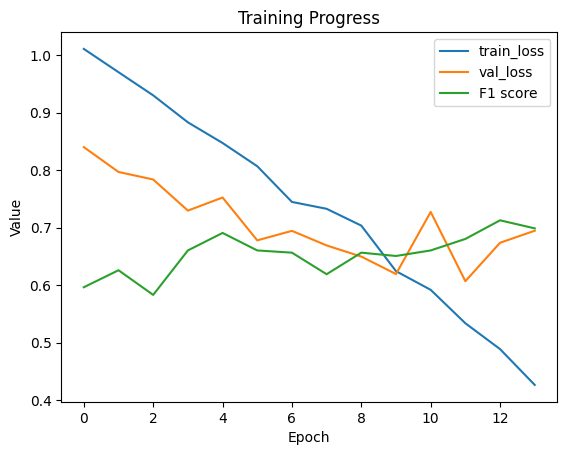

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.plot([report[i]["macro avg"]["f1-score"] for i in range(len(report))], label='F1 score')

plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.legend()
plt.show()

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned model
torch.save(best_model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_german_hs")

#### Evaluation

In [ ]:
# to access drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
best_model_hs = Model(dropout)
best_model_hs.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/model_german_hs"))
best_model_hs = best_model_hs.to(device)


Some weights of the model checkpoint at dbmdz/bert-base-german-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
set_reproducibility(seed)

# preprocessing
_, _, _, _, X_test, y_test = preprocessing()

# tokenization
test_dataloader = tokenization(X_test, y_test, batch_size=batch_size)

criterion = torch.nn.BCEWithLogitsLoss()


<ipython-input-61-962963644a13>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(input_ids)
<ipython-input-61-962963644a13>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(attention_mask)


In [ ]:
loss, report = val_fn(test_dataloader, best_model_hs, criterion)

print(f"\nLoss: {loss}")

100%|██████████| 2/2 [00:00<00:00, 35.23it/s]


Loss: 0.6116878688335419


#### Error Analysis - Classification report

In [ ]:
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.788732,0.823529,0.805755,68.000000
1,0.478261,0.423077,0.448980,26.000000
accuracy,0.712766,0.712766,0.712766,0.712766
macro avg,0.633497,0.623303,0.627367,94.000000
weighted avg,0.702857,0.712766,0.707073,94.000000
